In [132]:
# Improting Packages
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.callbacks import History 

import pandas as pd

In [5]:
# Checking if GPU is available
tf.test.is_gpu_available()

True

In [22]:
# Loading MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [23]:
import numpy as np
seed = 22
np.random.seed(seed)

In [24]:
X_train.shape

(60000, 28, 28)

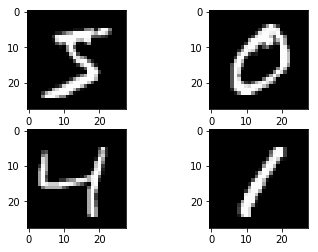

In [27]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))

plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [28]:
X_train.shape[0]

60000

In [29]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [30]:
#Normalizing train and test data
X_train = X_train / 255
X_test = X_test / 255

In [33]:
#Converting target variable to one-hot encoding
y_train = np_utils.to_categorical(y_train)   
y_test = np_utils.to_categorical(y_test)

In [37]:
num_classes = y_test.shape[1]

In [96]:
def createModelTwoLayers(learn_rate,momentum):
    '''Creates Model with 2 layers and return it'''
    model = Sequential()
    model.add(Dense(num_pixels,input_dim = num_pixels,kernel_initializer='random_normal',activation='relu'))
    model.add(Dense(64,kernel_initializer='random_normal',activation='relu'))
    model.add(Dense(num_classes,kernel_initializer='random_normal',activation='softmax'))
    optimizer = SGD(lr=learn_rate,momentum = momentum)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
    

In [117]:
def createModelThreeLayers(learn_rate,momentum):
    '''Creates Model with 3 layers and return it'''
    model = Sequential()
    model.add(Dense(num_pixels,input_dim = num_pixels,kernel_initializer='random_normal',activation='relu'))
    model.add(Dense(256,kernel_initializer='random_normal',activation='relu'))
    model.add(Dense(64,kernel_initializer='random_normal',activation='relu'))
    model.add(Dense(num_classes,kernel_initializer='random_normal',activation='softmax'))
    optimizer = SGD(lr=learn_rate,momentum = momentum)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [103]:
learn_rates = [0.001, 0.01, 0.1, 0.2, 0.3]
momentums = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]

In [101]:
# Lists to store Keras Histories of 2 layer models
histories_2layers = []
scores_2layers = []
counter = 0

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 2.2064 - acc: 0.2992 - val_loss: 2.0946 - val_acc: 0.4850
Epoch 2/10
 - 6s - loss: 1.9547 - acc: 0.5452 - val_loss: 1.7666 - val_acc: 0.6200
Epoch 3/10
 - 7s - loss: 1.5887 - acc: 0.6588 - val_loss: 1.3733 - val_acc: 0.7187
Epoch 4/10
 - 6s - loss: 1.2290 - acc: 0.7439 - val_loss: 1.0519 - val_acc: 0.7891
Epoch 5/10
 - 6s - loss: 0.9605 - acc: 0.7956 - val_loss: 0.8338 - val_acc: 0.8211
Epoch 6/10
 - 6s - loss: 0.7823 - acc: 0.8256 - val_loss: 0.6932 - val_acc: 0.8452
Epoch 7/10
 - 6s - loss: 0.6665 - acc: 0.8443 - val_loss: 0.6013 - val_acc: 0.8591
Epoch 8/10
 - 6s - loss: 0.5884 - acc: 0.8572 - val_loss: 0.5379 - val_acc: 0.8698
Epoch 9/10
 - 6s - loss: 0.5334 - acc: 0.8667 - val_loss: 0.4927 - val_acc: 0.8767
Epoch 10/10
 - 6s - loss: 0.4927 - acc: 0.8741 - val_loss: 0.4585 - val_acc: 0.8838


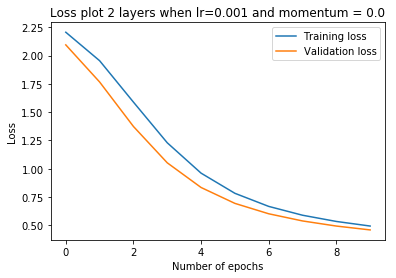

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 2.2246 - acc: 0.2587 - val_loss: 2.1158 - val_acc: 0.4723
Epoch 2/10
 - 7s - loss: 1.9462 - acc: 0.6288 - val_loss: 1.7171 - val_acc: 0.7173
Epoch 3/10
 - 7s - loss: 1.4733 - acc: 0.7457 - val_loss: 1.2104 - val_acc: 0.7890
Epoch 4/10
 - 6s - loss: 1.0457 - acc: 0.7958 - val_loss: 0.8738 - val_acc: 0.8216
Epoch 5/10
 - 6s - loss: 0.7927 - acc: 0.8273 - val_loss: 0.6887 - val_acc: 0.8435
Epoch 6/10
 - 6s - loss: 0.6506 - acc: 0.8465 - val_loss: 0.5812 - val_acc: 0.8601
Epoch 7/10
 - 6s - loss: 0.5642 - acc: 0.8598 - val_loss: 0.5133 - val_acc: 0.8710
Epoch 8/10
 - 7s - loss: 0.5071 - acc: 0.8696 - val_loss: 0.4667 - val_acc: 0.8798
Epoch 9/10
 - 6s - loss: 0.4669 - acc: 0.8775 - val_loss: 0.4334 - val_acc: 0.8860
Epoch 10/10
 - 6s - loss: 0.4370 - acc: 0.8835 - val_loss: 0.4078 - val_acc: 0.8913


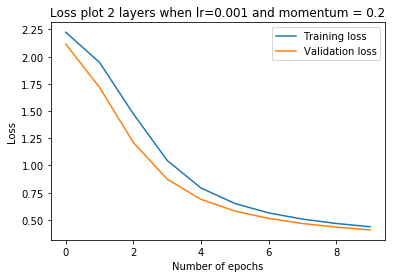

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 2.1532 - acc: 0.3729 - val_loss: 1.9596 - val_acc: 0.6089
Epoch 2/10
 - 6s - loss: 1.6611 - acc: 0.6710 - val_loss: 1.3142 - val_acc: 0.7321
Epoch 3/10
 - 6s - loss: 1.0678 - acc: 0.7716 - val_loss: 0.8438 - val_acc: 0.8129
Epoch 4/10
 - 6s - loss: 0.7459 - acc: 0.8243 - val_loss: 0.6356 - val_acc: 0.8442
Epoch 5/10
 - 6s - loss: 0.5961 - acc: 0.8491 - val_loss: 0.5288 - val_acc: 0.8653
Epoch 6/10
 - 6s - loss: 0.5134 - acc: 0.8652 - val_loss: 0.4648 - val_acc: 0.8768
Epoch 7/10
 - 7s - loss: 0.4610 - acc: 0.8765 - val_loss: 0.4225 - val_acc: 0.8859
Epoch 8/10
 - 6s - loss: 0.4248 - acc: 0.8846 - val_loss: 0.3920 - val_acc: 0.8919
Epoch 9/10
 - 7s - loss: 0.3982 - acc: 0.8903 - val_loss: 0.3691 - val_acc: 0.8967
Epoch 10/10
 - 6s - loss: 0.3776 - acc: 0.8953 - val_loss: 0.3525 - val_acc: 0.9017


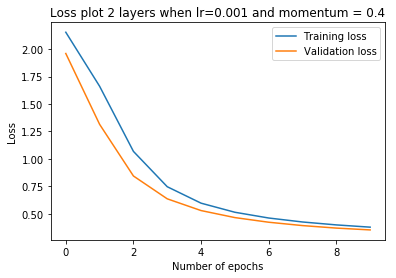

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 2.0690 - acc: 0.4891 - val_loss: 1.6877 - val_acc: 0.6864
Epoch 2/10
 - 7s - loss: 1.2506 - acc: 0.7360 - val_loss: 0.8886 - val_acc: 0.7974
Epoch 3/10
 - 7s - loss: 0.7479 - acc: 0.8173 - val_loss: 0.6083 - val_acc: 0.8476
Epoch 4/10
 - 7s - loss: 0.5626 - acc: 0.8539 - val_loss: 0.4874 - val_acc: 0.8752
Epoch 5/10
 - 7s - loss: 0.4724 - acc: 0.8737 - val_loss: 0.4231 - val_acc: 0.8882
Epoch 6/10
 - 6s - loss: 0.4192 - acc: 0.8858 - val_loss: 0.3814 - val_acc: 0.8980
Epoch 7/10
 - 6s - loss: 0.3839 - acc: 0.8942 - val_loss: 0.3539 - val_acc: 0.9030
Epoch 8/10
 - 6s - loss: 0.3584 - acc: 0.9009 - val_loss: 0.3331 - val_acc: 0.9082
Epoch 9/10
 - 6s - loss: 0.3389 - acc: 0.9052 - val_loss: 0.3164 - val_acc: 0.9123
Epoch 10/10
 - 6s - loss: 0.3233 - acc: 0.9089 - val_loss: 0.3039 - val_acc: 0.9154


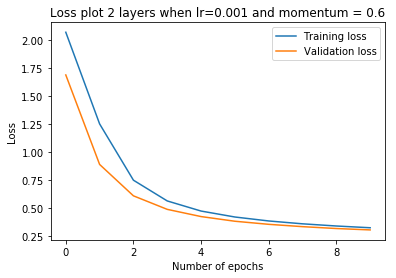

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 1.6422 - acc: 0.6075 - val_loss: 0.8463 - val_acc: 0.8278
Epoch 2/10
 - 7s - loss: 0.6241 - acc: 0.8486 - val_loss: 0.4662 - val_acc: 0.8784
Epoch 3/10
 - 7s - loss: 0.4310 - acc: 0.8831 - val_loss: 0.3735 - val_acc: 0.8963
Epoch 4/10
 - 6s - loss: 0.3667 - acc: 0.8966 - val_loss: 0.3318 - val_acc: 0.9064
Epoch 5/10
 - 6s - loss: 0.3315 - acc: 0.9052 - val_loss: 0.3055 - val_acc: 0.9132
Epoch 6/10
 - 6s - loss: 0.3070 - acc: 0.9114 - val_loss: 0.2858 - val_acc: 0.9193
Epoch 7/10
 - 6s - loss: 0.2877 - acc: 0.9172 - val_loss: 0.2688 - val_acc: 0.9239
Epoch 8/10
 - 7s - loss: 0.2717 - acc: 0.9218 - val_loss: 0.2565 - val_acc: 0.9281
Epoch 9/10
 - 7s - loss: 0.2578 - acc: 0.9259 - val_loss: 0.2438 - val_acc: 0.9312
Epoch 10/10
 - 6s - loss: 0.2454 - acc: 0.9297 - val_loss: 0.2342 - val_acc: 0.9340


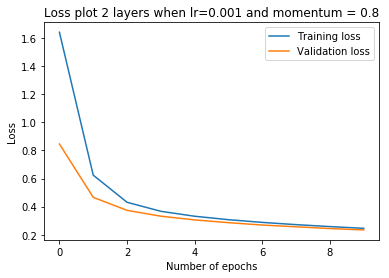

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 1.1612 - acc: 0.6933 - val_loss: 0.4681 - val_acc: 0.8798
Epoch 2/10
 - 6s - loss: 0.4018 - acc: 0.8906 - val_loss: 0.3301 - val_acc: 0.9079
Epoch 3/10
 - 6s - loss: 0.3223 - acc: 0.9084 - val_loss: 0.2866 - val_acc: 0.9186
Epoch 4/10
 - 6s - loss: 0.2828 - acc: 0.9193 - val_loss: 0.2580 - val_acc: 0.9266
Epoch 5/10
 - 6s - loss: 0.2544 - acc: 0.9278 - val_loss: 0.2344 - val_acc: 0.9330
Epoch 6/10
 - 6s - loss: 0.2320 - acc: 0.9347 - val_loss: 0.2180 - val_acc: 0.9366
Epoch 7/10
 - 6s - loss: 0.2129 - acc: 0.9400 - val_loss: 0.2018 - val_acc: 0.9417
Epoch 8/10
 - 6s - loss: 0.1972 - acc: 0.9444 - val_loss: 0.1895 - val_acc: 0.9442
Epoch 9/10
 - 6s - loss: 0.1830 - acc: 0.9484 - val_loss: 0.1770 - val_acc: 0.9477
Epoch 10/10
 - 6s - loss: 0.1702 - acc: 0.9520 - val_loss: 0.1674 - val_acc: 0.9519


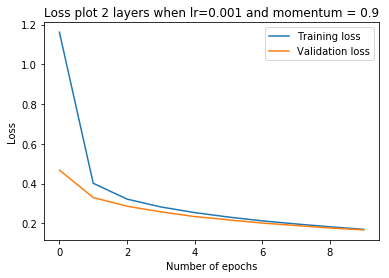

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 1.1367 - acc: 0.7319 - val_loss: 0.4708 - val_acc: 0.8731
Epoch 2/10
 - 6s - loss: 0.3988 - acc: 0.8914 - val_loss: 0.3328 - val_acc: 0.9048
Epoch 3/10
 - 6s - loss: 0.3176 - acc: 0.9105 - val_loss: 0.2831 - val_acc: 0.9190
Epoch 4/10
 - 6s - loss: 0.2780 - acc: 0.9215 - val_loss: 0.2527 - val_acc: 0.9287
Epoch 5/10
 - 6s - loss: 0.2502 - acc: 0.9294 - val_loss: 0.2360 - val_acc: 0.9316
Epoch 6/10
 - 6s - loss: 0.2288 - acc: 0.9357 - val_loss: 0.2190 - val_acc: 0.9380
Epoch 7/10
 - 6s - loss: 0.2104 - acc: 0.9406 - val_loss: 0.2015 - val_acc: 0.9413
Epoch 8/10
 - 6s - loss: 0.1949 - acc: 0.9446 - val_loss: 0.1860 - val_acc: 0.9457
Epoch 9/10
 - 6s - loss: 0.1809 - acc: 0.9486 - val_loss: 0.1759 - val_acc: 0.9494
Epoch 10/10
 - 6s - loss: 0.1687 - acc: 0.9520 - val_loss: 0.1645 - val_acc: 0.9526


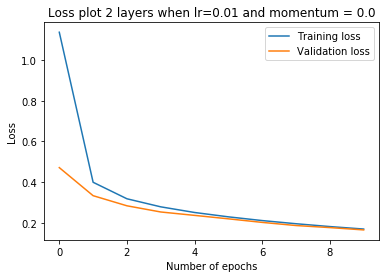

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 1.0552 - acc: 0.7416 - val_loss: 0.4260 - val_acc: 0.8848
Epoch 2/10
 - 6s - loss: 0.3698 - acc: 0.8962 - val_loss: 0.3065 - val_acc: 0.9126
Epoch 3/10
 - 6s - loss: 0.2955 - acc: 0.9155 - val_loss: 0.2643 - val_acc: 0.9241
Epoch 4/10
 - 6s - loss: 0.2571 - acc: 0.9266 - val_loss: 0.2331 - val_acc: 0.9335
Epoch 5/10
 - 6s - loss: 0.2285 - acc: 0.9344 - val_loss: 0.2119 - val_acc: 0.9382
Epoch 6/10
 - 6s - loss: 0.2058 - acc: 0.9418 - val_loss: 0.1946 - val_acc: 0.9416
Epoch 7/10
 - 6s - loss: 0.1871 - acc: 0.9467 - val_loss: 0.1778 - val_acc: 0.9482
Epoch 8/10
 - 6s - loss: 0.1707 - acc: 0.9515 - val_loss: 0.1658 - val_acc: 0.9514
Epoch 9/10
 - 6s - loss: 0.1573 - acc: 0.9550 - val_loss: 0.1550 - val_acc: 0.9550
Epoch 10/10
 - 6s - loss: 0.1452 - acc: 0.9588 - val_loss: 0.1443 - val_acc: 0.9572


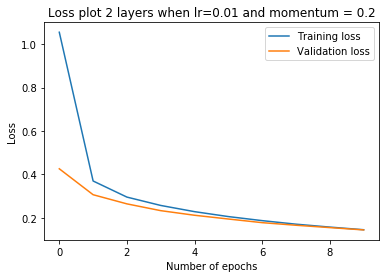

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.8619 - acc: 0.7810 - val_loss: 0.3594 - val_acc: 0.8988
Epoch 2/10
 - 6s - loss: 0.3239 - acc: 0.9077 - val_loss: 0.2746 - val_acc: 0.9215
Epoch 3/10
 - 6s - loss: 0.2647 - acc: 0.9245 - val_loss: 0.2409 - val_acc: 0.9288
Epoch 4/10
 - 6s - loss: 0.2280 - acc: 0.9344 - val_loss: 0.2106 - val_acc: 0.9401
Epoch 5/10
 - 6s - loss: 0.1993 - acc: 0.9428 - val_loss: 0.1903 - val_acc: 0.9433
Epoch 6/10
 - 6s - loss: 0.1765 - acc: 0.9500 - val_loss: 0.1676 - val_acc: 0.9512
Epoch 7/10
 - 6s - loss: 0.1579 - acc: 0.9550 - val_loss: 0.1526 - val_acc: 0.9549
Epoch 8/10
 - 6s - loss: 0.1426 - acc: 0.9595 - val_loss: 0.1444 - val_acc: 0.9552
Epoch 9/10
 - 6s - loss: 0.1299 - acc: 0.9631 - val_loss: 0.1340 - val_acc: 0.9605
Epoch 10/10
 - 6s - loss: 0.1185 - acc: 0.9660 - val_loss: 0.1224 - val_acc: 0.9636


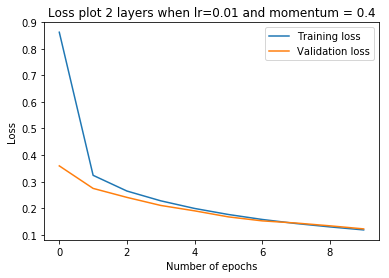

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.6962 - acc: 0.8128 - val_loss: 0.3072 - val_acc: 0.9142
Epoch 2/10
 - 6s - loss: 0.2814 - acc: 0.9205 - val_loss: 0.2384 - val_acc: 0.9327
Epoch 3/10
 - 6s - loss: 0.2238 - acc: 0.9364 - val_loss: 0.2007 - val_acc: 0.9403
Epoch 4/10
 - 6s - loss: 0.1863 - acc: 0.9471 - val_loss: 0.1747 - val_acc: 0.9487
Epoch 5/10
 - 6s - loss: 0.1585 - acc: 0.9551 - val_loss: 0.1486 - val_acc: 0.9565
Epoch 6/10
 - 6s - loss: 0.1368 - acc: 0.9610 - val_loss: 0.1381 - val_acc: 0.9600
Epoch 7/10
 - 6s - loss: 0.1200 - acc: 0.9663 - val_loss: 0.1227 - val_acc: 0.9635
Epoch 8/10
 - 6s - loss: 0.1062 - acc: 0.9700 - val_loss: 0.1140 - val_acc: 0.9668
Epoch 9/10
 - 6s - loss: 0.0945 - acc: 0.9734 - val_loss: 0.1045 - val_acc: 0.9688
Epoch 10/10
 - 6s - loss: 0.0850 - acc: 0.9758 - val_loss: 0.0978 - val_acc: 0.9708


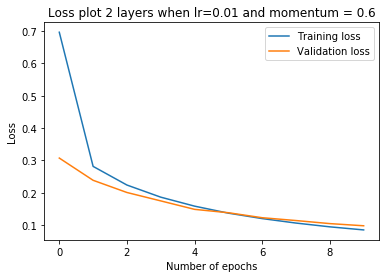

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.5065 - acc: 0.8584 - val_loss: 0.2445 - val_acc: 0.9295
Epoch 2/10
 - 6s - loss: 0.2092 - acc: 0.9392 - val_loss: 0.1786 - val_acc: 0.9468
Epoch 3/10
 - 6s - loss: 0.1509 - acc: 0.9571 - val_loss: 0.1332 - val_acc: 0.9603
Epoch 4/10
 - 6s - loss: 0.1178 - acc: 0.9663 - val_loss: 0.1198 - val_acc: 0.9644
Epoch 5/10
 - 6s - loss: 0.0946 - acc: 0.9728 - val_loss: 0.0975 - val_acc: 0.9690
Epoch 6/10
 - 6s - loss: 0.0785 - acc: 0.9776 - val_loss: 0.0884 - val_acc: 0.9738
Epoch 7/10
 - 6s - loss: 0.0648 - acc: 0.9818 - val_loss: 0.0899 - val_acc: 0.9708
Epoch 8/10
 - 6s - loss: 0.0554 - acc: 0.9842 - val_loss: 0.0823 - val_acc: 0.9741
Epoch 9/10
 - 6s - loss: 0.0471 - acc: 0.9872 - val_loss: 0.0751 - val_acc: 0.9767
Epoch 10/10
 - 6s - loss: 0.0400 - acc: 0.9895 - val_loss: 0.0718 - val_acc: 0.9771


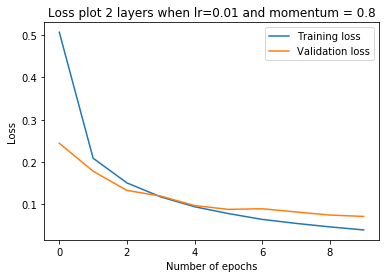

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.3905 - acc: 0.8882 - val_loss: 0.1812 - val_acc: 0.9480
Epoch 2/10
 - 6s - loss: 0.1463 - acc: 0.9565 - val_loss: 0.1265 - val_acc: 0.9612
Epoch 3/10
 - 6s - loss: 0.0976 - acc: 0.9712 - val_loss: 0.0993 - val_acc: 0.9694
Epoch 4/10
 - 6s - loss: 0.0704 - acc: 0.9790 - val_loss: 0.0858 - val_acc: 0.9737
Epoch 5/10
 - 6s - loss: 0.0530 - acc: 0.9845 - val_loss: 0.0794 - val_acc: 0.9747
Epoch 6/10
 - 6s - loss: 0.0408 - acc: 0.9884 - val_loss: 0.0714 - val_acc: 0.9787
Epoch 7/10
 - 6s - loss: 0.0314 - acc: 0.9912 - val_loss: 0.0720 - val_acc: 0.9771
Epoch 8/10
 - 6s - loss: 0.0240 - acc: 0.9937 - val_loss: 0.0689 - val_acc: 0.9769
Epoch 9/10
 - 6s - loss: 0.0183 - acc: 0.9955 - val_loss: 0.0679 - val_acc: 0.9783
Epoch 10/10
 - 6s - loss: 0.0138 - acc: 0.9974 - val_loss: 0.0639 - val_acc: 0.9808


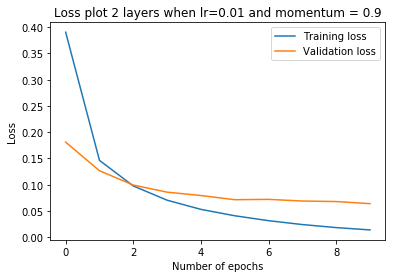

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.3636 - acc: 0.8948 - val_loss: 0.1734 - val_acc: 0.9469
Epoch 2/10
 - 6s - loss: 0.1434 - acc: 0.9573 - val_loss: 0.1355 - val_acc: 0.9558
Epoch 3/10
 - 6s - loss: 0.0966 - acc: 0.9722 - val_loss: 0.1074 - val_acc: 0.9663
Epoch 4/10
 - 6s - loss: 0.0709 - acc: 0.9796 - val_loss: 0.0870 - val_acc: 0.9725
Epoch 5/10
 - 6s - loss: 0.0533 - acc: 0.9847 - val_loss: 0.0810 - val_acc: 0.9745
Epoch 6/10
 - 6s - loss: 0.0409 - acc: 0.9882 - val_loss: 0.0768 - val_acc: 0.9762
Epoch 7/10
 - 6s - loss: 0.0311 - acc: 0.9917 - val_loss: 0.0674 - val_acc: 0.9783
Epoch 8/10
 - 6s - loss: 0.0246 - acc: 0.9934 - val_loss: 0.0627 - val_acc: 0.9799
Epoch 9/10
 - 6s - loss: 0.0184 - acc: 0.9956 - val_loss: 0.0616 - val_acc: 0.9796
Epoch 10/10
 - 6s - loss: 0.0140 - acc: 0.9971 - val_loss: 0.0665 - val_acc: 0.9794


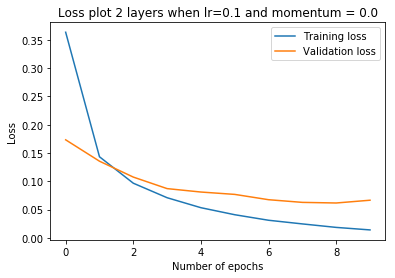

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.3440 - acc: 0.9016 - val_loss: 0.1621 - val_acc: 0.9539
Epoch 2/10
 - 6s - loss: 0.1258 - acc: 0.9629 - val_loss: 0.1023 - val_acc: 0.9690
Epoch 3/10
 - 6s - loss: 0.0844 - acc: 0.9753 - val_loss: 0.0862 - val_acc: 0.9731
Epoch 4/10
 - 6s - loss: 0.0609 - acc: 0.9817 - val_loss: 0.0916 - val_acc: 0.9706
Epoch 5/10
 - 6s - loss: 0.0459 - acc: 0.9864 - val_loss: 0.0759 - val_acc: 0.9764
Epoch 6/10
 - 6s - loss: 0.0344 - acc: 0.9899 - val_loss: 0.0657 - val_acc: 0.9797
Epoch 7/10
 - 6s - loss: 0.0260 - acc: 0.9927 - val_loss: 0.0690 - val_acc: 0.9782
Epoch 8/10
 - 6s - loss: 0.0183 - acc: 0.9955 - val_loss: 0.0664 - val_acc: 0.9790
Epoch 9/10
 - 6s - loss: 0.0138 - acc: 0.9969 - val_loss: 0.0661 - val_acc: 0.9795
Epoch 10/10
 - 6s - loss: 0.0104 - acc: 0.9979 - val_loss: 0.0690 - val_acc: 0.9789


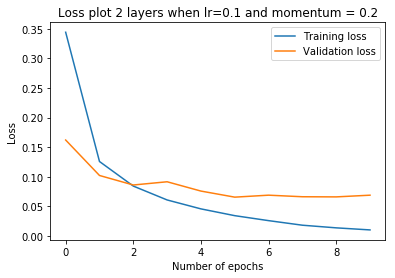

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.3043 - acc: 0.9114 - val_loss: 0.1349 - val_acc: 0.9601
Epoch 2/10
 - 6s - loss: 0.1115 - acc: 0.9671 - val_loss: 0.1005 - val_acc: 0.9694
Epoch 3/10
 - 6s - loss: 0.0717 - acc: 0.9782 - val_loss: 0.0829 - val_acc: 0.9748
Epoch 4/10
 - 6s - loss: 0.0502 - acc: 0.9850 - val_loss: 0.0727 - val_acc: 0.9755
Epoch 5/10
 - 6s - loss: 0.0352 - acc: 0.9899 - val_loss: 0.0712 - val_acc: 0.9776
Epoch 6/10
 - 6s - loss: 0.0252 - acc: 0.9931 - val_loss: 0.0656 - val_acc: 0.9778
Epoch 7/10
 - 6s - loss: 0.0172 - acc: 0.9955 - val_loss: 0.0631 - val_acc: 0.9813
Epoch 8/10
 - 6s - loss: 0.0122 - acc: 0.9972 - val_loss: 0.0712 - val_acc: 0.9783
Epoch 9/10
 - 6s - loss: 0.0076 - acc: 0.9987 - val_loss: 0.0671 - val_acc: 0.9802
Epoch 10/10
 - 6s - loss: 0.0054 - acc: 0.9991 - val_loss: 0.0652 - val_acc: 0.9817


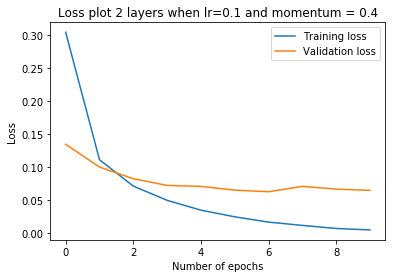

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2639 - acc: 0.9200 - val_loss: 0.1149 - val_acc: 0.9648
Epoch 2/10
 - 6s - loss: 0.0946 - acc: 0.9716 - val_loss: 0.0817 - val_acc: 0.9745
Epoch 3/10
 - 6s - loss: 0.0597 - acc: 0.9818 - val_loss: 0.0757 - val_acc: 0.9757
Epoch 4/10
 - 7s - loss: 0.0423 - acc: 0.9865 - val_loss: 0.0742 - val_acc: 0.9772
Epoch 5/10
 - 7s - loss: 0.0293 - acc: 0.9910 - val_loss: 0.0681 - val_acc: 0.9788
Epoch 6/10
 - 7s - loss: 0.0208 - acc: 0.9938 - val_loss: 0.0852 - val_acc: 0.9752
Epoch 7/10
 - 6s - loss: 0.0128 - acc: 0.9963 - val_loss: 0.0974 - val_acc: 0.9701
Epoch 8/10
 - 7s - loss: 0.0093 - acc: 0.9973 - val_loss: 0.0667 - val_acc: 0.9815
Epoch 9/10
 - 8s - loss: 0.0050 - acc: 0.9990 - val_loss: 0.0675 - val_acc: 0.9825
Epoch 10/10
 - 8s - loss: 0.0024 - acc: 0.9997 - val_loss: 0.0606 - val_acc: 0.9831


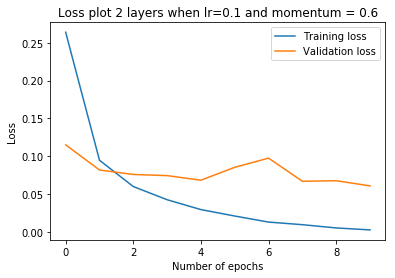

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2320 - acc: 0.9283 - val_loss: 0.1052 - val_acc: 0.9665
Epoch 2/10
 - 6s - loss: 0.0862 - acc: 0.9729 - val_loss: 0.1044 - val_acc: 0.9681
Epoch 3/10
 - 6s - loss: 0.0544 - acc: 0.9827 - val_loss: 0.0755 - val_acc: 0.9756
Epoch 4/10
 - 6s - loss: 0.0392 - acc: 0.9877 - val_loss: 0.0903 - val_acc: 0.9718
Epoch 5/10
 - 6s - loss: 0.0277 - acc: 0.9907 - val_loss: 0.0668 - val_acc: 0.9807
Epoch 6/10
 - 6s - loss: 0.0221 - acc: 0.9925 - val_loss: 0.0676 - val_acc: 0.9806
Epoch 7/10
 - 6s - loss: 0.0171 - acc: 0.9943 - val_loss: 0.0696 - val_acc: 0.9816
Epoch 8/10
 - 6s - loss: 0.0119 - acc: 0.9960 - val_loss: 0.0751 - val_acc: 0.9801
Epoch 9/10
 - 6s - loss: 0.0091 - acc: 0.9971 - val_loss: 0.0790 - val_acc: 0.9810
Epoch 10/10
 - 6s - loss: 0.0075 - acc: 0.9977 - val_loss: 0.0859 - val_acc: 0.9793


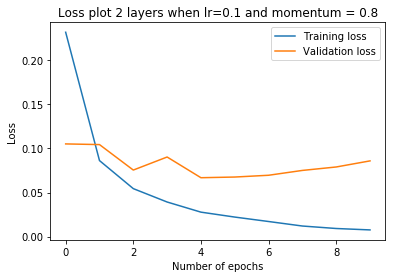

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2467 - acc: 0.9235 - val_loss: 0.1203 - val_acc: 0.9629
Epoch 2/10
 - 6s - loss: 0.1051 - acc: 0.9685 - val_loss: 0.0883 - val_acc: 0.9730
Epoch 3/10
 - 6s - loss: 0.0749 - acc: 0.9771 - val_loss: 0.0994 - val_acc: 0.9709
Epoch 4/10
 - 6s - loss: 0.0603 - acc: 0.9814 - val_loss: 0.0940 - val_acc: 0.9726
Epoch 5/10
 - 6s - loss: 0.0479 - acc: 0.9850 - val_loss: 0.1257 - val_acc: 0.9694
Epoch 6/10
 - 6s - loss: 0.0408 - acc: 0.9872 - val_loss: 0.1096 - val_acc: 0.9742
Epoch 7/10
 - 6s - loss: 0.0385 - acc: 0.9878 - val_loss: 0.1126 - val_acc: 0.9726
Epoch 8/10
 - 6s - loss: 0.0287 - acc: 0.9909 - val_loss: 0.1208 - val_acc: 0.9726
Epoch 9/10
 - 6s - loss: 0.0326 - acc: 0.9899 - val_loss: 0.0931 - val_acc: 0.9780
Epoch 10/10
 - 6s - loss: 0.0229 - acc: 0.9926 - val_loss: 0.1182 - val_acc: 0.9730


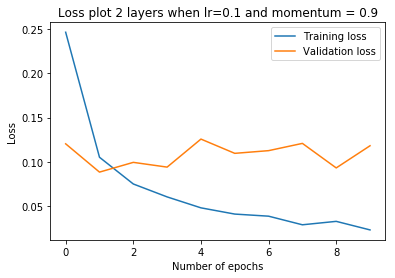

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2894 - acc: 0.9124 - val_loss: 0.1240 - val_acc: 0.9596
Epoch 2/10
 - 6s - loss: 0.1024 - acc: 0.9691 - val_loss: 0.1012 - val_acc: 0.9671
Epoch 3/10
 - 6s - loss: 0.0653 - acc: 0.9803 - val_loss: 0.1062 - val_acc: 0.9673
Epoch 4/10
 - 6s - loss: 0.0456 - acc: 0.9863 - val_loss: 0.0713 - val_acc: 0.9774
Epoch 5/10
 - 6s - loss: 0.0314 - acc: 0.9911 - val_loss: 0.0687 - val_acc: 0.9777
Epoch 6/10
 - 6s - loss: 0.0216 - acc: 0.9936 - val_loss: 0.0754 - val_acc: 0.9772
Epoch 7/10
 - 6s - loss: 0.0147 - acc: 0.9959 - val_loss: 0.1049 - val_acc: 0.9676
Epoch 8/10
 - 6s - loss: 0.0099 - acc: 0.9975 - val_loss: 0.0698 - val_acc: 0.9803
Epoch 9/10
 - 6s - loss: 0.0068 - acc: 0.9986 - val_loss: 0.0610 - val_acc: 0.9826
Epoch 10/10
 - 6s - loss: 0.0038 - acc: 0.9996 - val_loss: 0.0644 - val_acc: 0.9819


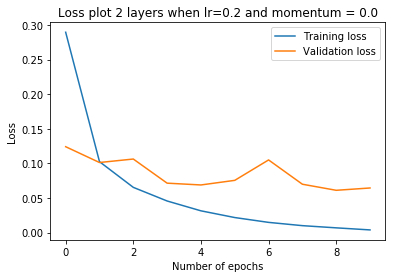

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2644 - acc: 0.9204 - val_loss: 0.1090 - val_acc: 0.9636
Epoch 2/10
 - 6s - loss: 0.0931 - acc: 0.9720 - val_loss: 0.0867 - val_acc: 0.9720
Epoch 3/10
 - 6s - loss: 0.0601 - acc: 0.9816 - val_loss: 0.0886 - val_acc: 0.9712
Epoch 4/10
 - 7s - loss: 0.0410 - acc: 0.9872 - val_loss: 0.0690 - val_acc: 0.9795
Epoch 5/10
 - 7s - loss: 0.0281 - acc: 0.9916 - val_loss: 0.0741 - val_acc: 0.9780
Epoch 6/10
 - 7s - loss: 0.0198 - acc: 0.9942 - val_loss: 0.0665 - val_acc: 0.9807
Epoch 7/10
 - 7s - loss: 0.0125 - acc: 0.9965 - val_loss: 0.0610 - val_acc: 0.9814
Epoch 8/10
 - 7s - loss: 0.0083 - acc: 0.9980 - val_loss: 0.0572 - val_acc: 0.9825
Epoch 9/10
 - 6s - loss: 0.0043 - acc: 0.9992 - val_loss: 0.0617 - val_acc: 0.9823
Epoch 10/10
 - 6s - loss: 0.0027 - acc: 0.9995 - val_loss: 0.0562 - val_acc: 0.9856


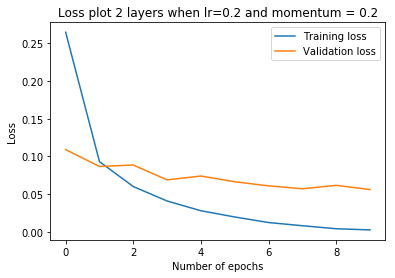

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2442 - acc: 0.9248 - val_loss: 0.1185 - val_acc: 0.9622
Epoch 2/10
 - 6s - loss: 0.0866 - acc: 0.9728 - val_loss: 0.1017 - val_acc: 0.9682
Epoch 3/10
 - 6s - loss: 0.0561 - acc: 0.9822 - val_loss: 0.0746 - val_acc: 0.9773
Epoch 4/10
 - 6s - loss: 0.0381 - acc: 0.9877 - val_loss: 0.0812 - val_acc: 0.9751
Epoch 5/10
 - 6s - loss: 0.0254 - acc: 0.9922 - val_loss: 0.0678 - val_acc: 0.9802
Epoch 6/10
 - 6s - loss: 0.0173 - acc: 0.9943 - val_loss: 0.0733 - val_acc: 0.9806
Epoch 7/10
 - 6s - loss: 0.0105 - acc: 0.9968 - val_loss: 0.0638 - val_acc: 0.9809
Epoch 8/10
 - 6s - loss: 0.0076 - acc: 0.9979 - val_loss: 0.0717 - val_acc: 0.9816
Epoch 9/10
 - 6s - loss: 0.0034 - acc: 0.9993 - val_loss: 0.0698 - val_acc: 0.9828
Epoch 10/10
 - 6s - loss: 0.0015 - acc: 0.9998 - val_loss: 0.0649 - val_acc: 0.9835


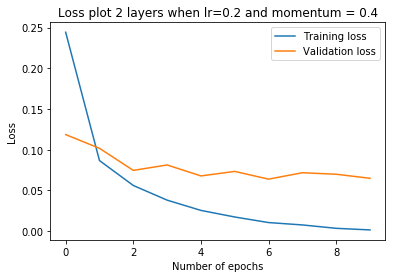

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2267 - acc: 0.9300 - val_loss: 0.0995 - val_acc: 0.9693
Epoch 2/10
 - 6s - loss: 0.0855 - acc: 0.9737 - val_loss: 0.0920 - val_acc: 0.9723
Epoch 3/10
 - 6s - loss: 0.0569 - acc: 0.9821 - val_loss: 0.1000 - val_acc: 0.9709
Epoch 4/10
 - 6s - loss: 0.0389 - acc: 0.9874 - val_loss: 0.0748 - val_acc: 0.9791
Epoch 5/10
 - 6s - loss: 0.0282 - acc: 0.9907 - val_loss: 0.0805 - val_acc: 0.9774
Epoch 6/10
 - 6s - loss: 0.0230 - acc: 0.9928 - val_loss: 0.0778 - val_acc: 0.9779
Epoch 7/10
 - 6s - loss: 0.0177 - acc: 0.9943 - val_loss: 0.0734 - val_acc: 0.9806
Epoch 8/10
 - 6s - loss: 0.0133 - acc: 0.9955 - val_loss: 0.0759 - val_acc: 0.9813
Epoch 9/10
 - 6s - loss: 0.0114 - acc: 0.9965 - val_loss: 0.0804 - val_acc: 0.9806
Epoch 10/10
 - 6s - loss: 0.0087 - acc: 0.9969 - val_loss: 0.0728 - val_acc: 0.9825


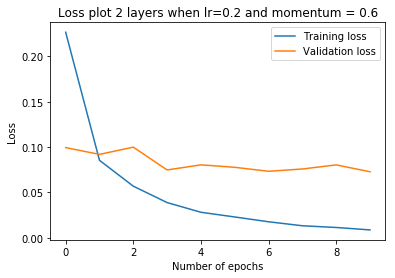

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2315 - acc: 0.9291 - val_loss: 0.1116 - val_acc: 0.9643
Epoch 2/10
 - 6s - loss: 0.1005 - acc: 0.9693 - val_loss: 0.0963 - val_acc: 0.9718
Epoch 3/10
 - 6s - loss: 0.0714 - acc: 0.9782 - val_loss: 0.1033 - val_acc: 0.9707
Epoch 4/10
 - 6s - loss: 0.0572 - acc: 0.9820 - val_loss: 0.0806 - val_acc: 0.9759
Epoch 5/10
 - 6s - loss: 0.0455 - acc: 0.9851 - val_loss: 0.0835 - val_acc: 0.9763
Epoch 6/10
 - 6s - loss: 0.0388 - acc: 0.9879 - val_loss: 0.0856 - val_acc: 0.9786
Epoch 7/10
 - 6s - loss: 0.0322 - acc: 0.9898 - val_loss: 0.0935 - val_acc: 0.9759
Epoch 8/10
 - 6s - loss: 0.0309 - acc: 0.9906 - val_loss: 0.0957 - val_acc: 0.9790
Epoch 9/10
 - 6s - loss: 0.0291 - acc: 0.9909 - val_loss: 0.0926 - val_acc: 0.9780
Epoch 10/10
 - 6s - loss: 0.0204 - acc: 0.9932 - val_loss: 0.1232 - val_acc: 0.9737


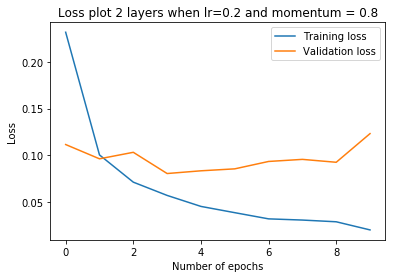

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.3254 - acc: 0.9053 - val_loss: 0.2253 - val_acc: 0.9354
Epoch 2/10
 - 6s - loss: 0.1950 - acc: 0.9482 - val_loss: 0.1921 - val_acc: 0.9498
Epoch 3/10
 - 6s - loss: 0.1675 - acc: 0.9573 - val_loss: 0.2251 - val_acc: 0.9493
Epoch 4/10
 - 6s - loss: 0.1545 - acc: 0.9617 - val_loss: 0.1672 - val_acc: 0.9563
Epoch 5/10
 - 7s - loss: 0.1470 - acc: 0.9639 - val_loss: 0.1760 - val_acc: 0.9598
Epoch 6/10
 - 6s - loss: 0.1368 - acc: 0.9673 - val_loss: 0.1830 - val_acc: 0.9604
Epoch 7/10
 - 6s - loss: 0.1126 - acc: 0.9726 - val_loss: 0.1662 - val_acc: 0.9634
Epoch 8/10
 - 6s - loss: 0.1147 - acc: 0.9735 - val_loss: 0.1898 - val_acc: 0.9634
Epoch 9/10
 - 6s - loss: 0.1158 - acc: 0.9738 - val_loss: 0.1944 - val_acc: 0.9642
Epoch 10/10
 - 6s - loss: 0.1392 - acc: 0.9698 - val_loss: 0.1954 - val_acc: 0.9621


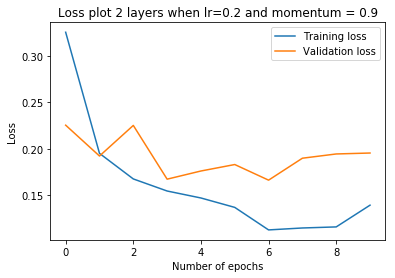

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2597 - acc: 0.9188 - val_loss: 0.1290 - val_acc: 0.9596
Epoch 2/10
 - 6s - loss: 0.0895 - acc: 0.9727 - val_loss: 0.0793 - val_acc: 0.9734
Epoch 3/10
 - 6s - loss: 0.0575 - acc: 0.9825 - val_loss: 0.0697 - val_acc: 0.9766
Epoch 4/10
 - 6s - loss: 0.0374 - acc: 0.9882 - val_loss: 0.0733 - val_acc: 0.9757
Epoch 5/10
 - 6s - loss: 0.0249 - acc: 0.9925 - val_loss: 0.0723 - val_acc: 0.9785
Epoch 6/10
 - 6s - loss: 0.0178 - acc: 0.9948 - val_loss: 0.0586 - val_acc: 0.9818
Epoch 7/10
 - 6s - loss: 0.0118 - acc: 0.9966 - val_loss: 0.0670 - val_acc: 0.9807
Epoch 8/10
 - 6s - loss: 0.0077 - acc: 0.9979 - val_loss: 0.0603 - val_acc: 0.9841
Epoch 9/10
 - 6s - loss: 0.0034 - acc: 0.9994 - val_loss: 0.0607 - val_acc: 0.9834
Epoch 10/10
 - 6s - loss: 0.0019 - acc: 0.9997 - val_loss: 0.0588 - val_acc: 0.9844


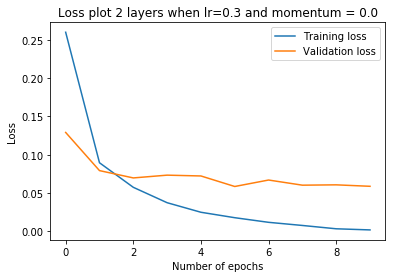

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2381 - acc: 0.9267 - val_loss: 0.1480 - val_acc: 0.9491
Epoch 2/10
 - 6s - loss: 0.0852 - acc: 0.9744 - val_loss: 0.0811 - val_acc: 0.9743
Epoch 3/10
 - 6s - loss: 0.0556 - acc: 0.9823 - val_loss: 0.0862 - val_acc: 0.9733
Epoch 4/10
 - 6s - loss: 0.0387 - acc: 0.9872 - val_loss: 0.0768 - val_acc: 0.9754
Epoch 5/10
 - 6s - loss: 0.0271 - acc: 0.9914 - val_loss: 0.0574 - val_acc: 0.9822
Epoch 6/10
 - 6s - loss: 0.0170 - acc: 0.9949 - val_loss: 0.0715 - val_acc: 0.9782
Epoch 7/10
 - 6s - loss: 0.0116 - acc: 0.9965 - val_loss: 0.0659 - val_acc: 0.9813
Epoch 8/10
 - 6s - loss: 0.0079 - acc: 0.9977 - val_loss: 0.0854 - val_acc: 0.9771
Epoch 9/10
 - 6s - loss: 0.0067 - acc: 0.9980 - val_loss: 0.0639 - val_acc: 0.9822
Epoch 10/10
 - 6s - loss: 0.0037 - acc: 0.9991 - val_loss: 0.0619 - val_acc: 0.9836


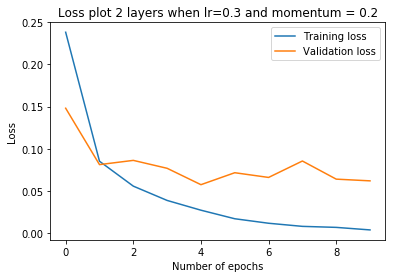

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2267 - acc: 0.9299 - val_loss: 0.1050 - val_acc: 0.9674
Epoch 2/10
 - 6s - loss: 0.0839 - acc: 0.9744 - val_loss: 0.0940 - val_acc: 0.9699
Epoch 3/10
 - 6s - loss: 0.0558 - acc: 0.9818 - val_loss: 0.0688 - val_acc: 0.9799
Epoch 4/10
 - 6s - loss: 0.0385 - acc: 0.9878 - val_loss: 0.0847 - val_acc: 0.9743
Epoch 5/10
 - 6s - loss: 0.0270 - acc: 0.9912 - val_loss: 0.0753 - val_acc: 0.9769
Epoch 6/10
 - 6s - loss: 0.0240 - acc: 0.9922 - val_loss: 0.0654 - val_acc: 0.9810
Epoch 7/10
 - 6s - loss: 0.0147 - acc: 0.9952 - val_loss: 0.0775 - val_acc: 0.9780
Epoch 8/10
 - 6s - loss: 0.0106 - acc: 0.9964 - val_loss: 0.0702 - val_acc: 0.9824
Epoch 9/10
 - 6s - loss: 0.0092 - acc: 0.9971 - val_loss: 0.0708 - val_acc: 0.9831
Epoch 10/10
 - 6s - loss: 0.0081 - acc: 0.9973 - val_loss: 0.0864 - val_acc: 0.9792


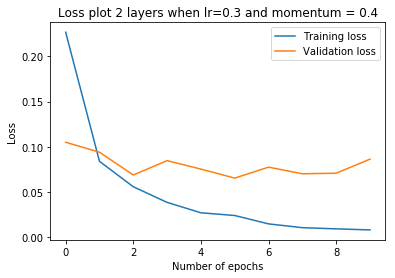

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2363 - acc: 0.9271 - val_loss: 0.0981 - val_acc: 0.9685
Epoch 2/10
 - 6s - loss: 0.0938 - acc: 0.9707 - val_loss: 0.0945 - val_acc: 0.9732
Epoch 3/10
 - 6s - loss: 0.0647 - acc: 0.9797 - val_loss: 0.0948 - val_acc: 0.9711
Epoch 4/10
 - 6s - loss: 0.0469 - acc: 0.9851 - val_loss: 0.0978 - val_acc: 0.9714
Epoch 5/10
 - 6s - loss: 0.0381 - acc: 0.9878 - val_loss: 0.0760 - val_acc: 0.9785
Epoch 6/10
 - 6s - loss: 0.0264 - acc: 0.9912 - val_loss: 0.0962 - val_acc: 0.9771
Epoch 7/10
 - 6s - loss: 0.0253 - acc: 0.9920 - val_loss: 0.0922 - val_acc: 0.9759
Epoch 8/10
 - 6s - loss: 0.0194 - acc: 0.9937 - val_loss: 0.0810 - val_acc: 0.9809
Epoch 9/10
 - 6s - loss: 0.0178 - acc: 0.9944 - val_loss: 0.1000 - val_acc: 0.9779
Epoch 10/10
 - 6s - loss: 0.0145 - acc: 0.9954 - val_loss: 0.0869 - val_acc: 0.9789


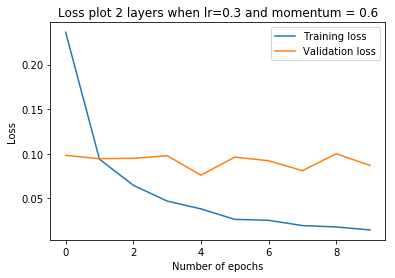

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2763 - acc: 0.9170 - val_loss: 0.1643 - val_acc: 0.9513
Epoch 2/10
 - 6s - loss: 0.1375 - acc: 0.9609 - val_loss: 0.1240 - val_acc: 0.9646
Epoch 3/10
 - 6s - loss: 0.1056 - acc: 0.9697 - val_loss: 0.1207 - val_acc: 0.9649
Epoch 4/10
 - 6s - loss: 0.0876 - acc: 0.9747 - val_loss: 0.1235 - val_acc: 0.9691
Epoch 5/10
 - 6s - loss: 0.0729 - acc: 0.9786 - val_loss: 0.1214 - val_acc: 0.9646
Epoch 6/10
 - 6s - loss: 0.0643 - acc: 0.9818 - val_loss: 0.1281 - val_acc: 0.9693
Epoch 7/10
 - 6s - loss: 0.0641 - acc: 0.9820 - val_loss: 0.1602 - val_acc: 0.9645
Epoch 8/10
 - 6s - loss: 0.0605 - acc: 0.9834 - val_loss: 0.2096 - val_acc: 0.9536
Epoch 9/10
 - 6s - loss: 0.0704 - acc: 0.9817 - val_loss: 0.1803 - val_acc: 0.9666
Epoch 10/10
 - 6s - loss: 0.0638 - acc: 0.9836 - val_loss: 0.1378 - val_acc: 0.9713


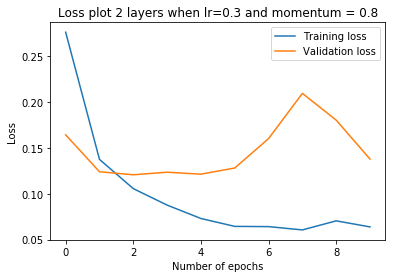

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.6841 - acc: 0.8279 - val_loss: 0.6276 - val_acc: 0.8457
Epoch 2/10
 - 6s - loss: 2.1369 - acc: 0.2743 - val_loss: 2.3274 - val_acc: 0.1009
Epoch 3/10
 - 6s - loss: 2.3117 - acc: 0.1028 - val_loss: 2.3109 - val_acc: 0.1032
Epoch 4/10
 - 6s - loss: 2.3125 - acc: 0.1068 - val_loss: 2.3123 - val_acc: 0.0980
Epoch 5/10
 - 6s - loss: 2.3117 - acc: 0.1022 - val_loss: 2.3086 - val_acc: 0.1028
Epoch 6/10
 - 6s - loss: 2.3116 - acc: 0.1053 - val_loss: 2.3128 - val_acc: 0.0980
Epoch 7/10
 - 6s - loss: 2.3113 - acc: 0.1035 - val_loss: 2.3080 - val_acc: 0.0958
Epoch 8/10
 - 6s - loss: 2.3116 - acc: 0.1035 - val_loss: 2.3214 - val_acc: 0.1135
Epoch 9/10
 - 6s - loss: 2.3127 - acc: 0.1036 - val_loss: 2.3089 - val_acc: 0.1135
Epoch 10/10
 - 6s - loss: 2.3114 - acc: 0.1040 - val_loss: 2.3187 - val_acc: 0.1135


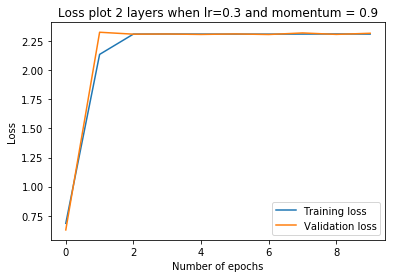

<Figure size 432x288 with 0 Axes>

In [113]:
## Training models with 2 layers varying lr and momentum
for lr in learn_rates:
    for momentum in momentums:
        counter+=1
        history = History()
        model = createModelTwoLayers(lr,momentum)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=2,callbacks=[history])
        # Final evaluation of the model
        score = model.evaluate(X_test, y_test, verbose=0)
        histories_2layers.append([history])
        scores_2layers.append(score)
        plt.plot([i for i in range(10)],history.history['loss'],label='Training loss')
        plt.plot([i for i in range(10)],history.history['val_loss'],label='Validation loss')
        plt.legend()
        plt.title('Loss plot 2 layers when lr={} and momentum = {}'.format(lr,momentum))
        plt.xlabel('Number of epochs')
        plt.ylabel('Loss')
        plt.show()
        plt.savefig('{}'.format(counter)+'.png')

In [170]:
len(histories_2layers)

36

In [115]:
# Lists to store Keras Histories of 3 layer models
histories_3layers = []
scores_3layers = []


38
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 2.2794 - acc: 0.1761 - val_loss: 2.2471 - val_acc: 0.3254
Epoch 2/10
 - 9s - loss: 2.2021 - acc: 0.4283 - val_loss: 2.1382 - val_acc: 0.4970
Epoch 3/10
 - 7s - loss: 2.0447 - acc: 0.5289 - val_loss: 1.9088 - val_acc: 0.5713
Epoch 4/10
 - 7s - loss: 1.7371 - acc: 0.6139 - val_loss: 1.5155 - val_acc: 0.6726
Epoch 5/10
 - 7s - loss: 1.3244 - acc: 0.7074 - val_loss: 1.1126 - val_acc: 0.7602
Epoch 6/10
 - 7s - loss: 0.9868 - acc: 0.7763 - val_loss: 0.8462 - val_acc: 0.8014
Epoch 7/10
 - 7s - loss: 0.7773 - acc: 0.8125 - val_loss: 0.6872 - val_acc: 0.8282
Epoch 8/10
 - 7s - loss: 0.6510 - acc: 0.8353 - val_loss: 0.5902 - val_acc: 0.8423
Epoch 9/10
 - 7s - loss: 0.5712 - acc: 0.8504 - val_loss: 0.5259 - val_acc: 0.8573
Epoch 10/10
 - 8s - loss: 0.5165 - acc: 0.8615 - val_loss: 0.4816 - val_acc: 0.8695


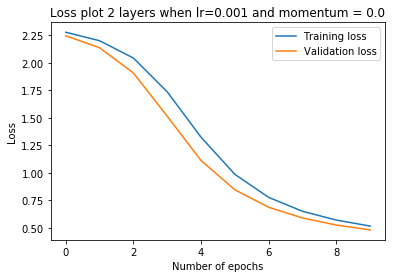

39
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 2.2697 - acc: 0.1912 - val_loss: 2.2312 - val_acc: 0.3010
Epoch 2/10
 - 7s - loss: 2.1735 - acc: 0.3812 - val_loss: 2.0891 - val_acc: 0.4647
Epoch 3/10
 - 7s - loss: 1.9558 - acc: 0.5538 - val_loss: 1.7670 - val_acc: 0.6464
Epoch 4/10
 - 7s - loss: 1.5336 - acc: 0.6759 - val_loss: 1.2593 - val_acc: 0.7157
Epoch 5/10
 - 7s - loss: 1.0766 - acc: 0.7439 - val_loss: 0.8848 - val_acc: 0.7777
Epoch 6/10
 - 7s - loss: 0.8013 - acc: 0.7951 - val_loss: 0.6893 - val_acc: 0.8172
Epoch 7/10
 - 7s - loss: 0.6526 - acc: 0.8259 - val_loss: 0.5770 - val_acc: 0.8430
Epoch 8/10
 - 7s - loss: 0.5620 - acc: 0.8466 - val_loss: 0.5071 - val_acc: 0.8600
Epoch 9/10
 - 7s - loss: 0.5011 - acc: 0.8621 - val_loss: 0.4562 - val_acc: 0.8745
Epoch 10/10
 - 7s - loss: 0.4574 - acc: 0.8737 - val_loss: 0.4218 - val_acc: 0.8813


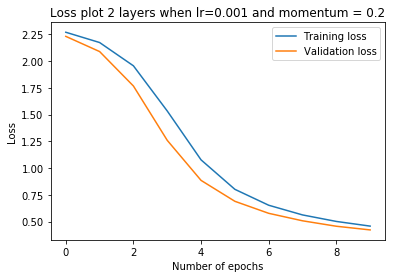

40
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 2.2522 - acc: 0.2404 - val_loss: 2.1848 - val_acc: 0.4274
Epoch 2/10
 - 7s - loss: 2.0574 - acc: 0.5242 - val_loss: 1.8573 - val_acc: 0.6064
Epoch 3/10
 - 8s - loss: 1.5324 - acc: 0.6817 - val_loss: 1.1613 - val_acc: 0.7451
Epoch 4/10
 - 9s - loss: 0.9413 - acc: 0.7837 - val_loss: 0.7479 - val_acc: 0.8185
Epoch 5/10
 - 7s - loss: 0.6727 - acc: 0.8293 - val_loss: 0.5782 - val_acc: 0.8454
Epoch 6/10
 - 8s - loss: 0.5488 - acc: 0.8535 - val_loss: 0.4892 - val_acc: 0.8652
Epoch 7/10
 - 8s - loss: 0.4786 - acc: 0.8684 - val_loss: 0.4353 - val_acc: 0.8788
Epoch 8/10
 - 9s - loss: 0.4332 - acc: 0.8791 - val_loss: 0.3982 - val_acc: 0.8860
Epoch 9/10
 - 8s - loss: 0.4009 - acc: 0.8873 - val_loss: 0.3724 - val_acc: 0.8938
Epoch 10/10
 - 8s - loss: 0.3765 - acc: 0.8950 - val_loss: 0.3512 - val_acc: 0.8989


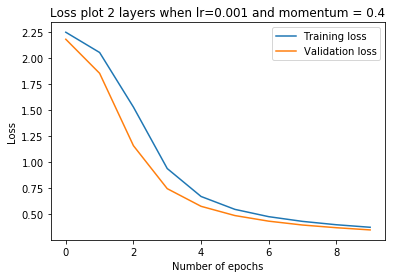

41
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 2.1974 - acc: 0.3610 - val_loss: 2.0201 - val_acc: 0.5427
Epoch 2/10
 - 7s - loss: 1.5782 - acc: 0.6481 - val_loss: 1.0494 - val_acc: 0.7825
Epoch 3/10
 - 9s - loss: 0.8013 - acc: 0.8079 - val_loss: 0.6122 - val_acc: 0.8422
Epoch 4/10
 - 7s - loss: 0.5503 - acc: 0.8516 - val_loss: 0.4724 - val_acc: 0.8727
Epoch 5/10
 - 7s - loss: 0.4525 - acc: 0.8744 - val_loss: 0.4060 - val_acc: 0.8872
Epoch 6/10
 - 7s - loss: 0.4003 - acc: 0.8879 - val_loss: 0.3665 - val_acc: 0.8956
Epoch 7/10
 - 8s - loss: 0.3669 - acc: 0.8970 - val_loss: 0.3397 - val_acc: 0.9014
Epoch 8/10
 - 8s - loss: 0.3424 - acc: 0.9031 - val_loss: 0.3189 - val_acc: 0.9082
Epoch 9/10
 - 7s - loss: 0.3232 - acc: 0.9085 - val_loss: 0.3013 - val_acc: 0.9145
Epoch 10/10
 - 7s - loss: 0.3069 - acc: 0.9134 - val_loss: 0.2888 - val_acc: 0.9168


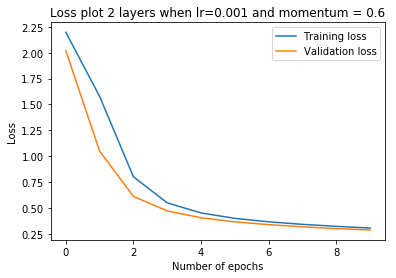

42
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 11s - loss: 2.0243 - acc: 0.4988 - val_loss: 1.3211 - val_acc: 0.7309
Epoch 2/10
 - 9s - loss: 0.7762 - acc: 0.8106 - val_loss: 0.5033 - val_acc: 0.8597
Epoch 3/10
 - 8s - loss: 0.4478 - acc: 0.8740 - val_loss: 0.3771 - val_acc: 0.8945
Epoch 4/10
 - 7s - loss: 0.3652 - acc: 0.8958 - val_loss: 0.3287 - val_acc: 0.9059
Epoch 5/10
 - 7s - loss: 0.3224 - acc: 0.9070 - val_loss: 0.2950 - val_acc: 0.9148
Epoch 6/10
 - 7s - loss: 0.2933 - acc: 0.9162 - val_loss: 0.2752 - val_acc: 0.9205
Epoch 7/10
 - 7s - loss: 0.2707 - acc: 0.9229 - val_loss: 0.2558 - val_acc: 0.9270
Epoch 8/10
 - 7s - loss: 0.2522 - acc: 0.9279 - val_loss: 0.2398 - val_acc: 0.9313
Epoch 9/10
 - 7s - loss: 0.2357 - acc: 0.9328 - val_loss: 0.2252 - val_acc: 0.9359
Epoch 10/10
 - 7s - loss: 0.2213 - acc: 0.9367 - val_loss: 0.2146 - val_acc: 0.9366


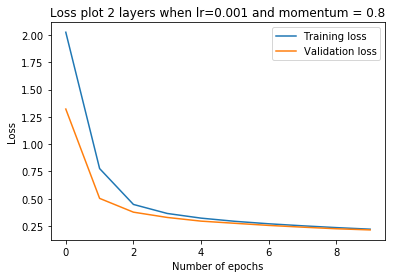

43
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 1.3578 - acc: 0.6301 - val_loss: 0.5017 - val_acc: 0.8682
Epoch 2/10
 - 7s - loss: 0.4107 - acc: 0.8844 - val_loss: 0.3371 - val_acc: 0.9041
Epoch 3/10
 - 7s - loss: 0.3101 - acc: 0.9106 - val_loss: 0.2677 - val_acc: 0.9229
Epoch 4/10
 - 7s - loss: 0.2620 - acc: 0.9239 - val_loss: 0.2396 - val_acc: 0.9319
Epoch 5/10
 - 7s - loss: 0.2280 - acc: 0.9346 - val_loss: 0.2065 - val_acc: 0.9398
Epoch 6/10
 - 7s - loss: 0.2023 - acc: 0.9417 - val_loss: 0.1900 - val_acc: 0.9441
Epoch 7/10
 - 7s - loss: 0.1809 - acc: 0.9482 - val_loss: 0.1697 - val_acc: 0.9486
Epoch 8/10
 - 7s - loss: 0.1627 - acc: 0.9538 - val_loss: 0.1550 - val_acc: 0.9525
Epoch 9/10
 - 7s - loss: 0.1487 - acc: 0.9574 - val_loss: 0.1466 - val_acc: 0.9555
Epoch 10/10
 - 7s - loss: 0.1354 - acc: 0.9613 - val_loss: 0.1355 - val_acc: 0.9589


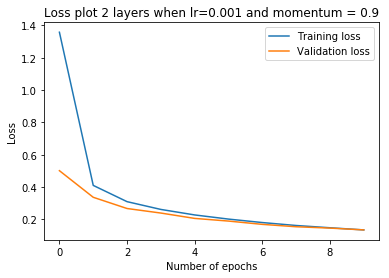

44
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 1.3568 - acc: 0.6344 - val_loss: 0.5323 - val_acc: 0.8536
Epoch 2/10
 - 7s - loss: 0.4204 - acc: 0.8811 - val_loss: 0.3291 - val_acc: 0.9056
Epoch 3/10
 - 7s - loss: 0.3104 - acc: 0.9110 - val_loss: 0.2699 - val_acc: 0.9235
Epoch 4/10
 - 8s - loss: 0.2627 - acc: 0.9246 - val_loss: 0.2391 - val_acc: 0.9303
Epoch 5/10
 - 8s - loss: 0.2286 - acc: 0.9346 - val_loss: 0.2183 - val_acc: 0.9365
Epoch 6/10
 - 8s - loss: 0.2020 - acc: 0.9418 - val_loss: 0.1877 - val_acc: 0.9443
Epoch 7/10
 - 7s - loss: 0.1805 - acc: 0.9482 - val_loss: 0.1716 - val_acc: 0.9484
Epoch 8/10
 - 7s - loss: 0.1627 - acc: 0.9535 - val_loss: 0.1589 - val_acc: 0.9522
Epoch 9/10
 - 7s - loss: 0.1477 - acc: 0.9574 - val_loss: 0.1467 - val_acc: 0.9568
Epoch 10/10
 - 8s - loss: 0.1350 - acc: 0.9615 - val_loss: 0.1371 - val_acc: 0.9582


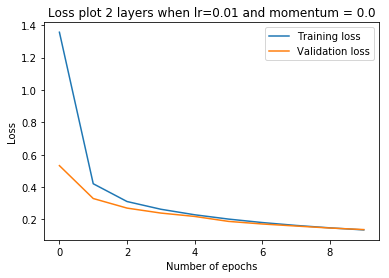

45
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 11s - loss: 1.1409 - acc: 0.7100 - val_loss: 0.4091 - val_acc: 0.8909
Epoch 2/10
 - 7s - loss: 0.3570 - acc: 0.8979 - val_loss: 0.2967 - val_acc: 0.9132
Epoch 3/10
 - 7s - loss: 0.2783 - acc: 0.9198 - val_loss: 0.2480 - val_acc: 0.9304
Epoch 4/10
 - 7s - loss: 0.2333 - acc: 0.9329 - val_loss: 0.2076 - val_acc: 0.9395
Epoch 5/10
 - 7s - loss: 0.2005 - acc: 0.9423 - val_loss: 0.1867 - val_acc: 0.9459
Epoch 6/10
 - 7s - loss: 0.1747 - acc: 0.9500 - val_loss: 0.1656 - val_acc: 0.9509
Epoch 7/10
 - 7s - loss: 0.1549 - acc: 0.9553 - val_loss: 0.1527 - val_acc: 0.9535
Epoch 8/10
 - 7s - loss: 0.1386 - acc: 0.9598 - val_loss: 0.1387 - val_acc: 0.9584
Epoch 9/10
 - 8s - loss: 0.1246 - acc: 0.9639 - val_loss: 0.1287 - val_acc: 0.9620
Epoch 10/10
 - 7s - loss: 0.1131 - acc: 0.9671 - val_loss: 0.1205 - val_acc: 0.9628


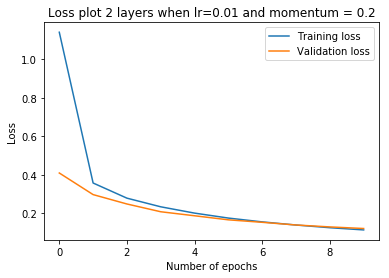

46
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 0.9979 - acc: 0.7186 - val_loss: 0.3648 - val_acc: 0.8948
Epoch 2/10
 - 7s - loss: 0.3151 - acc: 0.9100 - val_loss: 0.2594 - val_acc: 0.9251
Epoch 3/10
 - 7s - loss: 0.2410 - acc: 0.9301 - val_loss: 0.2195 - val_acc: 0.9350
Epoch 4/10
 - 7s - loss: 0.1976 - acc: 0.9426 - val_loss: 0.1761 - val_acc: 0.9485
Epoch 5/10
 - 7s - loss: 0.1667 - acc: 0.9521 - val_loss: 0.1531 - val_acc: 0.9543
Epoch 6/10
 - 7s - loss: 0.1439 - acc: 0.9585 - val_loss: 0.1361 - val_acc: 0.9590
Epoch 7/10
 - 7s - loss: 0.1254 - acc: 0.9636 - val_loss: 0.1294 - val_acc: 0.9601
Epoch 8/10
 - 7s - loss: 0.1106 - acc: 0.9685 - val_loss: 0.1154 - val_acc: 0.9661
Epoch 9/10
 - 7s - loss: 0.0978 - acc: 0.9717 - val_loss: 0.1113 - val_acc: 0.9661
Epoch 10/10
 - 7s - loss: 0.0868 - acc: 0.9754 - val_loss: 0.1137 - val_acc: 0.9650


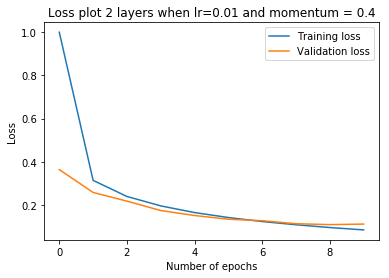

47
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 0.7729 - acc: 0.7917 - val_loss: 0.3041 - val_acc: 0.9146
Epoch 2/10
 - 7s - loss: 0.2593 - acc: 0.9249 - val_loss: 0.2128 - val_acc: 0.9377
Epoch 3/10
 - 7s - loss: 0.1905 - acc: 0.9453 - val_loss: 0.1631 - val_acc: 0.9529
Epoch 4/10
 - 7s - loss: 0.1507 - acc: 0.9565 - val_loss: 0.1345 - val_acc: 0.9603
Epoch 5/10
 - 7s - loss: 0.1240 - acc: 0.9641 - val_loss: 0.1189 - val_acc: 0.9636
Epoch 6/10
 - 7s - loss: 0.1037 - acc: 0.9692 - val_loss: 0.1113 - val_acc: 0.9651
Epoch 7/10
 - 12s - loss: 0.0893 - acc: 0.9739 - val_loss: 0.1002 - val_acc: 0.9701
Epoch 8/10
 - 15s - loss: 0.0761 - acc: 0.9780 - val_loss: 0.0918 - val_acc: 0.9721
Epoch 9/10
 - 12s - loss: 0.0662 - acc: 0.9816 - val_loss: 0.0849 - val_acc: 0.9738
Epoch 10/10
 - 12s - loss: 0.0571 - acc: 0.9841 - val_loss: 0.0853 - val_acc: 0.9736


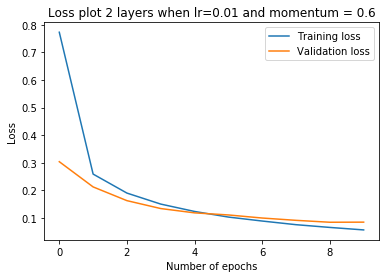

48
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 17s - loss: 0.5685 - acc: 0.8361 - val_loss: 0.2393 - val_acc: 0.9320
Epoch 2/10
 - 13s - loss: 0.1892 - acc: 0.9445 - val_loss: 0.1473 - val_acc: 0.9557
Epoch 3/10
 - 12s - loss: 0.1275 - acc: 0.9628 - val_loss: 0.1146 - val_acc: 0.9637
Epoch 4/10
 - 12s - loss: 0.0936 - acc: 0.9726 - val_loss: 0.0933 - val_acc: 0.9702
Epoch 5/10
 - 12s - loss: 0.0716 - acc: 0.9789 - val_loss: 0.0818 - val_acc: 0.9751
Epoch 6/10
 - 12s - loss: 0.0552 - acc: 0.9841 - val_loss: 0.0758 - val_acc: 0.9758
Epoch 7/10
 - 12s - loss: 0.0445 - acc: 0.9869 - val_loss: 0.0711 - val_acc: 0.9787
Epoch 8/10
 - 12s - loss: 0.0344 - acc: 0.9903 - val_loss: 0.1026 - val_acc: 0.9684
Epoch 9/10
 - 12s - loss: 0.0271 - acc: 0.9925 - val_loss: 0.0700 - val_acc: 0.9780
Epoch 10/10
 - 12s - loss: 0.0207 - acc: 0.9946 - val_loss: 0.0767 - val_acc: 0.9768


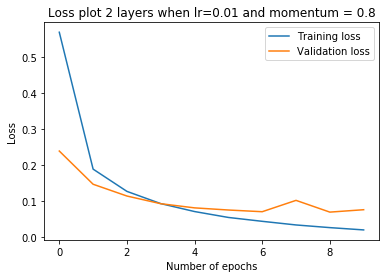

49
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 16s - loss: 0.4186 - acc: 0.8746 - val_loss: 0.1549 - val_acc: 0.9529
Epoch 2/10
 - 12s - loss: 0.1273 - acc: 0.9620 - val_loss: 0.1022 - val_acc: 0.9700
Epoch 3/10
 - 13s - loss: 0.0821 - acc: 0.9751 - val_loss: 0.0858 - val_acc: 0.9728
Epoch 4/10
 - 13s - loss: 0.0573 - acc: 0.9820 - val_loss: 0.0805 - val_acc: 0.9754
Epoch 5/10
 - 13s - loss: 0.0415 - acc: 0.9879 - val_loss: 0.0847 - val_acc: 0.9735
Epoch 6/10
 - 13s - loss: 0.0298 - acc: 0.9906 - val_loss: 0.0692 - val_acc: 0.9785
Epoch 7/10
 - 13s - loss: 0.0199 - acc: 0.9940 - val_loss: 0.0740 - val_acc: 0.9791
Epoch 8/10
 - 13s - loss: 0.0140 - acc: 0.9959 - val_loss: 0.0701 - val_acc: 0.9808
Epoch 9/10
 - 12s - loss: 0.0100 - acc: 0.9974 - val_loss: 0.0713 - val_acc: 0.9805
Epoch 10/10
 - 12s - loss: 0.0065 - acc: 0.9987 - val_loss: 0.0821 - val_acc: 0.9789


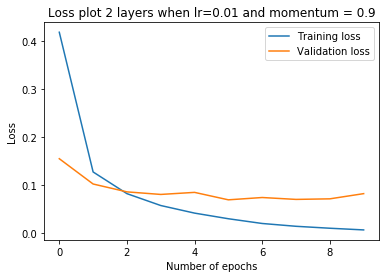

50
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 16s - loss: 0.3895 - acc: 0.8847 - val_loss: 0.1712 - val_acc: 0.9487
Epoch 2/10
 - 12s - loss: 0.1267 - acc: 0.9614 - val_loss: 0.1015 - val_acc: 0.9683
Epoch 3/10
 - 12s - loss: 0.0815 - acc: 0.9749 - val_loss: 0.0977 - val_acc: 0.9700
Epoch 4/10
 - 12s - loss: 0.0575 - acc: 0.9829 - val_loss: 0.0788 - val_acc: 0.9754
Epoch 5/10
 - 12s - loss: 0.0406 - acc: 0.9872 - val_loss: 0.0686 - val_acc: 0.9798
Epoch 6/10
 - 12s - loss: 0.0289 - acc: 0.9917 - val_loss: 0.0675 - val_acc: 0.9800
Epoch 7/10
 - 12s - loss: 0.0209 - acc: 0.9936 - val_loss: 0.0788 - val_acc: 0.9775
Epoch 8/10
 - 12s - loss: 0.0139 - acc: 0.9962 - val_loss: 0.0662 - val_acc: 0.9798
Epoch 9/10
 - 13s - loss: 0.0093 - acc: 0.9978 - val_loss: 0.0681 - val_acc: 0.9808
Epoch 10/10
 - 13s - loss: 0.0058 - acc: 0.9989 - val_loss: 0.0664 - val_acc: 0.9814


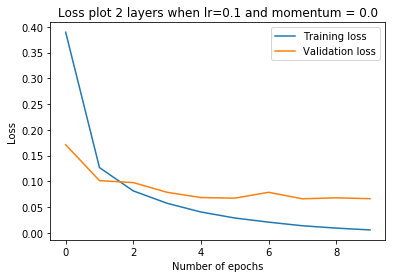

51
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 17s - loss: 0.3592 - acc: 0.8934 - val_loss: 0.1447 - val_acc: 0.9558
Epoch 2/10
 - 12s - loss: 0.1139 - acc: 0.9651 - val_loss: 0.1172 - val_acc: 0.9642
Epoch 3/10
 - 12s - loss: 0.0730 - acc: 0.9774 - val_loss: 0.0862 - val_acc: 0.9742
Epoch 4/10
 - 12s - loss: 0.0485 - acc: 0.9849 - val_loss: 0.0830 - val_acc: 0.9745
Epoch 5/10
 - 12s - loss: 0.0346 - acc: 0.9898 - val_loss: 0.0893 - val_acc: 0.9729
Epoch 6/10
 - 12s - loss: 0.0242 - acc: 0.9925 - val_loss: 0.0781 - val_acc: 0.9771
Epoch 7/10
 - 12s - loss: 0.0162 - acc: 0.9953 - val_loss: 0.0701 - val_acc: 0.9797
Epoch 8/10
 - 12s - loss: 0.0117 - acc: 0.9968 - val_loss: 0.0754 - val_acc: 0.9792
Epoch 9/10
 - 12s - loss: 0.0059 - acc: 0.9988 - val_loss: 0.0697 - val_acc: 0.9803
Epoch 10/10
 - 12s - loss: 0.0032 - acc: 0.9995 - val_loss: 0.0658 - val_acc: 0.9824


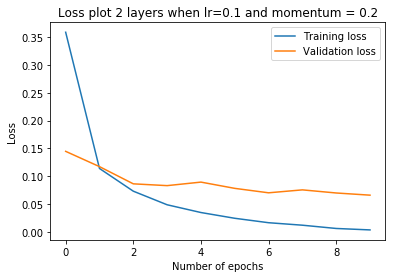

52
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 16s - loss: 0.3131 - acc: 0.9061 - val_loss: 0.2107 - val_acc: 0.9272
Epoch 2/10
 - 12s - loss: 0.1008 - acc: 0.9687 - val_loss: 0.1007 - val_acc: 0.9701
Epoch 3/10
 - 13s - loss: 0.0636 - acc: 0.9800 - val_loss: 0.0783 - val_acc: 0.9752
Epoch 4/10
 - 12s - loss: 0.0430 - acc: 0.9868 - val_loss: 0.1257 - val_acc: 0.9576
Epoch 5/10
 - 12s - loss: 0.0283 - acc: 0.9912 - val_loss: 0.0661 - val_acc: 0.9797
Epoch 6/10
 - 12s - loss: 0.0205 - acc: 0.9939 - val_loss: 0.0625 - val_acc: 0.9823
Epoch 7/10
 - 12s - loss: 0.0136 - acc: 0.9960 - val_loss: 0.0784 - val_acc: 0.9773
Epoch 8/10
 - 12s - loss: 0.0087 - acc: 0.9977 - val_loss: 0.0887 - val_acc: 0.9762
Epoch 9/10
 - 12s - loss: 0.0056 - acc: 0.9985 - val_loss: 0.0832 - val_acc: 0.9789
Epoch 10/10
 - 12s - loss: 0.0039 - acc: 0.9990 - val_loss: 0.0825 - val_acc: 0.9816


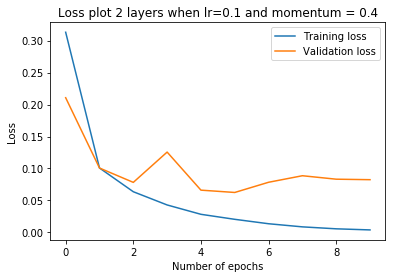

53
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 16s - loss: 0.2741 - acc: 0.9170 - val_loss: 0.1290 - val_acc: 0.9580
Epoch 2/10
 - 12s - loss: 0.0922 - acc: 0.9710 - val_loss: 0.1061 - val_acc: 0.9666
Epoch 3/10
 - 12s - loss: 0.0568 - acc: 0.9819 - val_loss: 0.0832 - val_acc: 0.9735
Epoch 4/10
 - 12s - loss: 0.0395 - acc: 0.9870 - val_loss: 0.0576 - val_acc: 0.9812
Epoch 5/10
 - 12s - loss: 0.0256 - acc: 0.9918 - val_loss: 0.0705 - val_acc: 0.9799
Epoch 6/10
 - 12s - loss: 0.0202 - acc: 0.9934 - val_loss: 0.0672 - val_acc: 0.9812
Epoch 7/10
 - 12s - loss: 0.0151 - acc: 0.9950 - val_loss: 0.0706 - val_acc: 0.9809
Epoch 8/10
 - 12s - loss: 0.0133 - acc: 0.9957 - val_loss: 0.0746 - val_acc: 0.9819
Epoch 9/10
 - 12s - loss: 0.0064 - acc: 0.9981 - val_loss: 0.0780 - val_acc: 0.9803
Epoch 10/10
 - 12s - loss: 0.0083 - acc: 0.9972 - val_loss: 0.0744 - val_acc: 0.9824


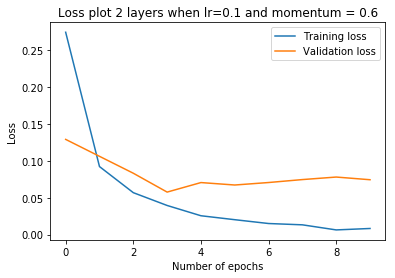

54
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 16s - loss: 0.2506 - acc: 0.9224 - val_loss: 0.0955 - val_acc: 0.9690
Epoch 2/10
 - 12s - loss: 0.0905 - acc: 0.9722 - val_loss: 0.0802 - val_acc: 0.9756
Epoch 3/10
 - 12s - loss: 0.0648 - acc: 0.9797 - val_loss: 0.0717 - val_acc: 0.9776
Epoch 4/10
 - 12s - loss: 0.0449 - acc: 0.9857 - val_loss: 0.0742 - val_acc: 0.9783
Epoch 5/10
 - 12s - loss: 0.0322 - acc: 0.9895 - val_loss: 0.0842 - val_acc: 0.9752
Epoch 6/10
 - 12s - loss: 0.0294 - acc: 0.9903 - val_loss: 0.0759 - val_acc: 0.9777
Epoch 7/10
 - 12s - loss: 0.0206 - acc: 0.9934 - val_loss: 0.0706 - val_acc: 0.9825
Epoch 8/10
 - 12s - loss: 0.0180 - acc: 0.9945 - val_loss: 0.0802 - val_acc: 0.9786
Epoch 9/10
 - 12s - loss: 0.0145 - acc: 0.9957 - val_loss: 0.0669 - val_acc: 0.9842
Epoch 10/10
 - 12s - loss: 0.0166 - acc: 0.9949 - val_loss: 0.0793 - val_acc: 0.9824


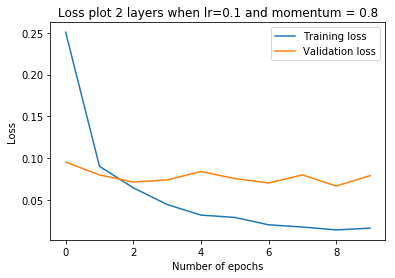

55
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 16s - loss: 0.2715 - acc: 0.9170 - val_loss: 0.1469 - val_acc: 0.9553
Epoch 2/10
 - 12s - loss: 0.1120 - acc: 0.9671 - val_loss: 0.1158 - val_acc: 0.9661
Epoch 3/10
 - 12s - loss: 0.0774 - acc: 0.9769 - val_loss: 0.0923 - val_acc: 0.9735
Epoch 4/10
 - 12s - loss: 0.0633 - acc: 0.9810 - val_loss: 0.0879 - val_acc: 0.9739
Epoch 5/10
 - 12s - loss: 0.0499 - acc: 0.9852 - val_loss: 0.0869 - val_acc: 0.9766
Epoch 6/10
 - 12s - loss: 0.0423 - acc: 0.9870 - val_loss: 0.1010 - val_acc: 0.9766
Epoch 7/10
 - 12s - loss: 0.0325 - acc: 0.9903 - val_loss: 0.0868 - val_acc: 0.9788
Epoch 8/10
 - 12s - loss: 0.0331 - acc: 0.9905 - val_loss: 0.1026 - val_acc: 0.9764
Epoch 9/10
 - 12s - loss: 0.0301 - acc: 0.9910 - val_loss: 0.0955 - val_acc: 0.9779
Epoch 10/10
 - 12s - loss: 0.0245 - acc: 0.9929 - val_loss: 0.0866 - val_acc: 0.9812


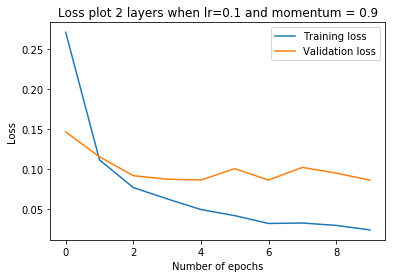

56
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 16s - loss: 0.3086 - acc: 0.9055 - val_loss: 0.1413 - val_acc: 0.9568
Epoch 2/10
 - 12s - loss: 0.0927 - acc: 0.9713 - val_loss: 0.1946 - val_acc: 0.9376
Epoch 3/10
 - 12s - loss: 0.0600 - acc: 0.9807 - val_loss: 0.0952 - val_acc: 0.9700
Epoch 4/10
 - 12s - loss: 0.0410 - acc: 0.9869 - val_loss: 0.0814 - val_acc: 0.9748
Epoch 5/10
 - 12s - loss: 0.0259 - acc: 0.9918 - val_loss: 0.0914 - val_acc: 0.9724
Epoch 6/10
 - 12s - loss: 0.0194 - acc: 0.9939 - val_loss: 0.0624 - val_acc: 0.9819
Epoch 7/10
 - 12s - loss: 0.0129 - acc: 0.9963 - val_loss: 0.1404 - val_acc: 0.9622
Epoch 8/10
 - 12s - loss: 0.0106 - acc: 0.9968 - val_loss: 0.0942 - val_acc: 0.9764
Epoch 9/10
 - 12s - loss: 0.0068 - acc: 0.9981 - val_loss: 0.0741 - val_acc: 0.9832
Epoch 10/10
 - 12s - loss: 0.0033 - acc: 0.9992 - val_loss: 0.0704 - val_acc: 0.9837


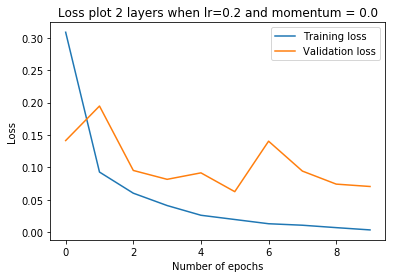

57
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 16s - loss: 0.2859 - acc: 0.9102 - val_loss: 0.1513 - val_acc: 0.9523
Epoch 2/10
 - 12s - loss: 0.0924 - acc: 0.9709 - val_loss: 0.0896 - val_acc: 0.9727
Epoch 3/10
 - 12s - loss: 0.0592 - acc: 0.9815 - val_loss: 0.2240 - val_acc: 0.9389
Epoch 4/10
 - 12s - loss: 0.0399 - acc: 0.9871 - val_loss: 0.0857 - val_acc: 0.9742
Epoch 5/10
 - 12s - loss: 0.0284 - acc: 0.9909 - val_loss: 0.0623 - val_acc: 0.9810
Epoch 6/10
 - 12s - loss: 0.0181 - acc: 0.9947 - val_loss: 0.0754 - val_acc: 0.9781
Epoch 7/10
 - 12s - loss: 0.0138 - acc: 0.9955 - val_loss: 0.0752 - val_acc: 0.9791
Epoch 8/10
 - 12s - loss: 0.0095 - acc: 0.9971 - val_loss: 0.0856 - val_acc: 0.9781
Epoch 9/10
 - 12s - loss: 0.0069 - acc: 0.9979 - val_loss: 0.0780 - val_acc: 0.9800
Epoch 10/10
 - 12s - loss: 0.0080 - acc: 0.9977 - val_loss: 0.0671 - val_acc: 0.9831


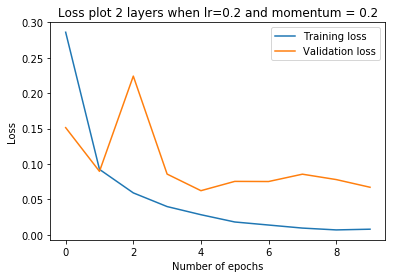

58
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 16s - loss: 0.2613 - acc: 0.9192 - val_loss: 0.1185 - val_acc: 0.9622
Epoch 2/10
 - 12s - loss: 0.0888 - acc: 0.9729 - val_loss: 0.0975 - val_acc: 0.9700
Epoch 3/10
 - 12s - loss: 0.0577 - acc: 0.9822 - val_loss: 0.0874 - val_acc: 0.9728
Epoch 4/10
 - 12s - loss: 0.0398 - acc: 0.9871 - val_loss: 0.0738 - val_acc: 0.9770
Epoch 5/10
 - 12s - loss: 0.0294 - acc: 0.9904 - val_loss: 0.0640 - val_acc: 0.9814
Epoch 6/10
 - 12s - loss: 0.0196 - acc: 0.9936 - val_loss: 0.0709 - val_acc: 0.9797
Epoch 7/10
 - 12s - loss: 0.0179 - acc: 0.9941 - val_loss: 0.0878 - val_acc: 0.9761
Epoch 8/10
 - 12s - loss: 0.0160 - acc: 0.9946 - val_loss: 0.0702 - val_acc: 0.9819
Epoch 9/10
 - 12s - loss: 0.0115 - acc: 0.9963 - val_loss: 0.0903 - val_acc: 0.9769
Epoch 10/10
 - 12s - loss: 0.0093 - acc: 0.9970 - val_loss: 0.0738 - val_acc: 0.9829


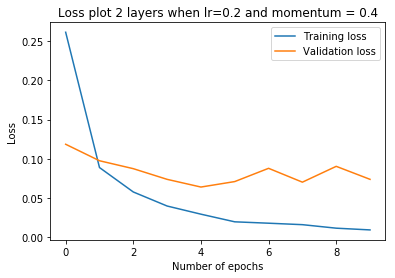

59
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 16s - loss: 0.2532 - acc: 0.9211 - val_loss: 0.1064 - val_acc: 0.9685
Epoch 2/10
 - 12s - loss: 0.0934 - acc: 0.9708 - val_loss: 0.0844 - val_acc: 0.9719
Epoch 3/10
 - 12s - loss: 0.0581 - acc: 0.9816 - val_loss: 0.0826 - val_acc: 0.9761
Epoch 4/10
 - 12s - loss: 0.0457 - acc: 0.9857 - val_loss: 0.0778 - val_acc: 0.9761
Epoch 5/10
 - 12s - loss: 0.0336 - acc: 0.9895 - val_loss: 0.0655 - val_acc: 0.9817
Epoch 6/10
 - 13s - loss: 0.0244 - acc: 0.9927 - val_loss: 0.0773 - val_acc: 0.9787
Epoch 7/10
 - 12s - loss: 0.0231 - acc: 0.9922 - val_loss: 0.0683 - val_acc: 0.9823
Epoch 8/10
 - 12s - loss: 0.0185 - acc: 0.9944 - val_loss: 0.0650 - val_acc: 0.9834
Epoch 9/10
 - 12s - loss: 0.0179 - acc: 0.9947 - val_loss: 0.0707 - val_acc: 0.9827
Epoch 10/10
 - 12s - loss: 0.0114 - acc: 0.9965 - val_loss: 0.0850 - val_acc: 0.9815


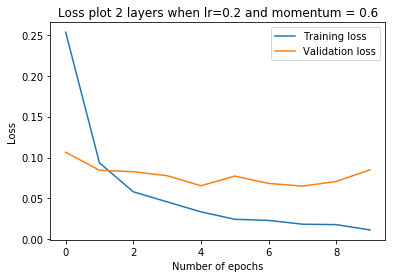

60
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 16s - loss: 0.2636 - acc: 0.9204 - val_loss: 0.1303 - val_acc: 0.9605
Epoch 2/10
 - 12s - loss: 0.1109 - acc: 0.9669 - val_loss: 0.1183 - val_acc: 0.9659
Epoch 3/10
 - 13s - loss: 0.0790 - acc: 0.9769 - val_loss: 0.0978 - val_acc: 0.9720
Epoch 4/10
 - 12s - loss: 0.0660 - acc: 0.9801 - val_loss: 0.0921 - val_acc: 0.9732
Epoch 5/10
 - 12s - loss: 0.0538 - acc: 0.9842 - val_loss: 0.0711 - val_acc: 0.9791
Epoch 6/10
 - 12s - loss: 0.0399 - acc: 0.9882 - val_loss: 0.1083 - val_acc: 0.9714
Epoch 7/10
 - 12s - loss: 0.0328 - acc: 0.9902 - val_loss: 0.0784 - val_acc: 0.9778
Epoch 8/10
 - 12s - loss: 0.0289 - acc: 0.9911 - val_loss: 0.0894 - val_acc: 0.9795
Epoch 9/10
 - 12s - loss: 0.0331 - acc: 0.9900 - val_loss: 0.1011 - val_acc: 0.9767
Epoch 10/10
 - 12s - loss: 0.0241 - acc: 0.9927 - val_loss: 0.0995 - val_acc: 0.9787


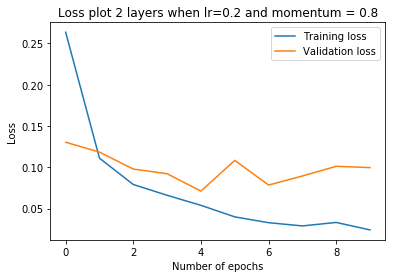

61
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 17s - loss: 0.4291 - acc: 0.8831 - val_loss: 0.2585 - val_acc: 0.9338
Epoch 2/10
 - 12s - loss: 0.2432 - acc: 0.9422 - val_loss: 0.2260 - val_acc: 0.9484
Epoch 3/10
 - 12s - loss: 0.2267 - acc: 0.9466 - val_loss: 0.2307 - val_acc: 0.9466
Epoch 4/10
 - 12s - loss: 1.4737 - acc: 0.7828 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 5/10
 - 12s - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 6/10
 - 12s - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 7/10
 - 12s - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 8/10
 - 12s - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 9/10
 - 12s - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 10/10
 - 12s - loss: 14.3070 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135


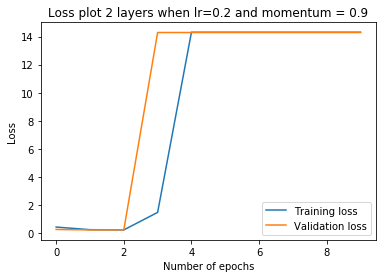

62
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 17s - loss: 0.2822 - acc: 0.9113 - val_loss: 0.1645 - val_acc: 0.9453
Epoch 2/10
 - 12s - loss: 0.0877 - acc: 0.9735 - val_loss: 0.1183 - val_acc: 0.9624
Epoch 3/10
 - 12s - loss: 0.0575 - acc: 0.9818 - val_loss: 0.1022 - val_acc: 0.9710
Epoch 4/10
 - 13s - loss: 0.0411 - acc: 0.9865 - val_loss: 0.0886 - val_acc: 0.9763
Epoch 5/10
 - 13s - loss: 0.0275 - acc: 0.9912 - val_loss: 0.0736 - val_acc: 0.9802
Epoch 6/10
 - 13s - loss: 0.0200 - acc: 0.9937 - val_loss: 0.0896 - val_acc: 0.9772
Epoch 7/10
 - 13s - loss: 0.0151 - acc: 0.9949 - val_loss: 0.0827 - val_acc: 0.9779
Epoch 8/10
 - 12s - loss: 0.0128 - acc: 0.9962 - val_loss: 0.0900 - val_acc: 0.9779
Epoch 9/10
 - 12s - loss: 0.0127 - acc: 0.9958 - val_loss: 0.0770 - val_acc: 0.9788
Epoch 10/10
 - 12s - loss: 0.0084 - acc: 0.9974 - val_loss: 0.1567 - val_acc: 0.9648


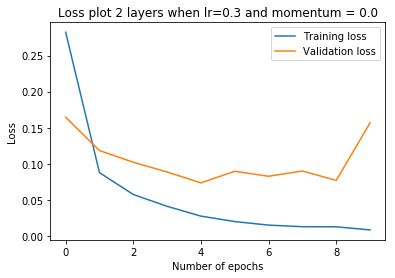

63
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 17s - loss: 0.2690 - acc: 0.9151 - val_loss: 0.1859 - val_acc: 0.9410
Epoch 2/10
 - 12s - loss: 0.0874 - acc: 0.9734 - val_loss: 0.1957 - val_acc: 0.9435
Epoch 3/10
 - 12s - loss: 0.0561 - acc: 0.9826 - val_loss: 0.0749 - val_acc: 0.9784
Epoch 4/10
 - 12s - loss: 0.0410 - acc: 0.9871 - val_loss: 0.1099 - val_acc: 0.9702
Epoch 5/10
 - 12s - loss: 0.0286 - acc: 0.9910 - val_loss: 0.0717 - val_acc: 0.9792
Epoch 6/10
 - 12s - loss: 0.0249 - acc: 0.9921 - val_loss: 0.0696 - val_acc: 0.9783
Epoch 7/10
 - 12s - loss: 0.0175 - acc: 0.9942 - val_loss: 0.0724 - val_acc: 0.9798
Epoch 8/10
 - 13s - loss: 0.0153 - acc: 0.9949 - val_loss: 0.0854 - val_acc: 0.9791
Epoch 9/10
 - 14s - loss: 0.0121 - acc: 0.9957 - val_loss: 0.0751 - val_acc: 0.9817
Epoch 10/10
 - 14s - loss: 0.0102 - acc: 0.9968 - val_loss: 0.1216 - val_acc: 0.9719


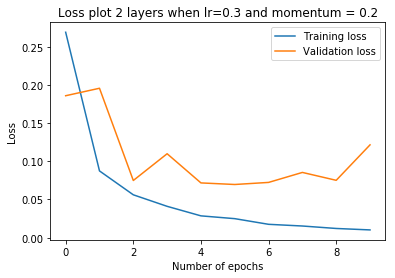

64
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 18s - loss: 0.2587 - acc: 0.9193 - val_loss: 0.1440 - val_acc: 0.9554
Epoch 2/10
 - 13s - loss: 0.0922 - acc: 0.9722 - val_loss: 0.0903 - val_acc: 0.9715
Epoch 3/10
 - 13s - loss: 0.0599 - acc: 0.9812 - val_loss: 0.0702 - val_acc: 0.9796
Epoch 4/10
 - 13s - loss: 0.0454 - acc: 0.9855 - val_loss: 0.0790 - val_acc: 0.9773
Epoch 5/10
 - 12s - loss: 0.0313 - acc: 0.9902 - val_loss: 0.0718 - val_acc: 0.9801
Epoch 6/10
 - 12s - loss: 0.0286 - acc: 0.9907 - val_loss: 0.0873 - val_acc: 0.9765
Epoch 7/10
 - 12s - loss: 0.0209 - acc: 0.9936 - val_loss: 0.0743 - val_acc: 0.9801
Epoch 8/10
 - 12s - loss: 0.0180 - acc: 0.9942 - val_loss: 0.0871 - val_acc: 0.9781
Epoch 9/10
 - 12s - loss: 0.0154 - acc: 0.9952 - val_loss: 0.0718 - val_acc: 0.9826
Epoch 10/10
 - 12s - loss: 0.0093 - acc: 0.9974 - val_loss: 0.0761 - val_acc: 0.9823


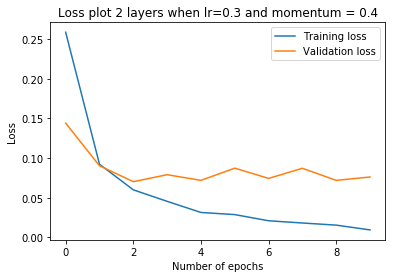

65
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 17s - loss: 0.2559 - acc: 0.9205 - val_loss: 0.1322 - val_acc: 0.9585
Epoch 2/10
 - 12s - loss: 0.0966 - acc: 0.9709 - val_loss: 0.0933 - val_acc: 0.9714
Epoch 3/10
 - 12s - loss: 0.0688 - acc: 0.9794 - val_loss: 0.0933 - val_acc: 0.9729
Epoch 4/10
 - 12s - loss: 0.0539 - acc: 0.9836 - val_loss: 0.0916 - val_acc: 0.9751
Epoch 5/10
 - 12s - loss: 0.0406 - acc: 0.9877 - val_loss: 0.0823 - val_acc: 0.9777
Epoch 6/10
 - 12s - loss: 0.0336 - acc: 0.9896 - val_loss: 0.0789 - val_acc: 0.9787
Epoch 7/10
 - 12s - loss: 0.0285 - acc: 0.9911 - val_loss: 0.0762 - val_acc: 0.9812
Epoch 8/10
 - 12s - loss: 0.0242 - acc: 0.9923 - val_loss: 0.0852 - val_acc: 0.9750
Epoch 9/10
 - 12s - loss: 0.0199 - acc: 0.9940 - val_loss: 0.0950 - val_acc: 0.9783
Epoch 10/10
 - 12s - loss: 0.0193 - acc: 0.9941 - val_loss: 0.1049 - val_acc: 0.9749


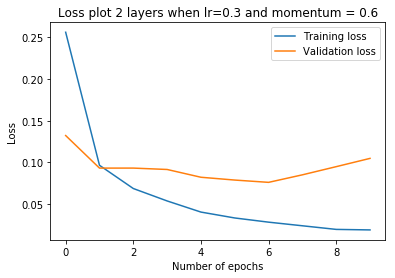

66
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 17s - loss: 0.3074 - acc: 0.9106 - val_loss: 0.1677 - val_acc: 0.9527
Epoch 2/10
 - 12s - loss: 0.1432 - acc: 0.9600 - val_loss: 0.1793 - val_acc: 0.9487
Epoch 3/10
 - 12s - loss: 0.1106 - acc: 0.9693 - val_loss: 0.1174 - val_acc: 0.9714
Epoch 4/10
 - 12s - loss: 0.0917 - acc: 0.9753 - val_loss: 0.1468 - val_acc: 0.9664
Epoch 5/10
 - 12s - loss: 0.0791 - acc: 0.9784 - val_loss: 0.1253 - val_acc: 0.9671
Epoch 6/10
 - 12s - loss: 0.0769 - acc: 0.9797 - val_loss: 0.1344 - val_acc: 0.9692
Epoch 7/10
 - 12s - loss: 0.0614 - acc: 0.9832 - val_loss: 0.1145 - val_acc: 0.9726
Epoch 8/10
 - 12s - loss: 0.0635 - acc: 0.9837 - val_loss: 0.1383 - val_acc: 0.9712
Epoch 9/10
 - 12s - loss: 0.0616 - acc: 0.9843 - val_loss: 0.1009 - val_acc: 0.9753
Epoch 10/10
 - 12s - loss: 0.0593 - acc: 0.9848 - val_loss: 0.1137 - val_acc: 0.9736


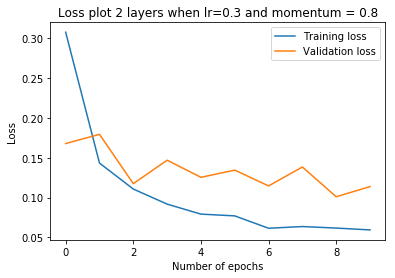

67
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 17s - loss: 2.1862 - acc: 0.1814 - val_loss: 2.3116 - val_acc: 0.1135
Epoch 2/10
 - 12s - loss: 2.3108 - acc: 0.1045 - val_loss: 2.3091 - val_acc: 0.1010
Epoch 3/10
 - 12s - loss: 2.3121 - acc: 0.1040 - val_loss: 2.3089 - val_acc: 0.1009
Epoch 4/10
 - 12s - loss: 2.3119 - acc: 0.1032 - val_loss: 2.3090 - val_acc: 0.1032
Epoch 5/10
 - 12s - loss: 2.3130 - acc: 0.1046 - val_loss: 2.3106 - val_acc: 0.0958
Epoch 6/10
 - 12s - loss: 2.3117 - acc: 0.1049 - val_loss: 2.3077 - val_acc: 0.0974
Epoch 7/10
 - 12s - loss: 2.3120 - acc: 0.1032 - val_loss: 2.3058 - val_acc: 0.0958
Epoch 8/10
 - 12s - loss: 2.3114 - acc: 0.1029 - val_loss: 2.3210 - val_acc: 0.1028
Epoch 9/10
 - 12s - loss: 2.3116 - acc: 0.1045 - val_loss: 2.3091 - val_acc: 0.0982
Epoch 10/10
 - 12s - loss: 2.3119 - acc: 0.1013 - val_loss: 2.3161 - val_acc: 0.1135


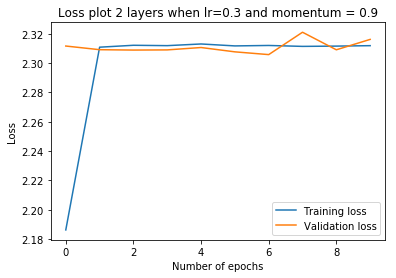

<Figure size 432x288 with 0 Axes>

In [118]:
## Training models with 2 layers varying lr and momentum
for lr in learn_rates:
    for momentum in momentums:
        counter+=1
        print(counter)
        history = History()
        model = createModelThreeLayers(lr,momentum)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=2,callbacks=[history])
        # Final evaluation of the model
        score = model.evaluate(X_test, y_test, verbose=0)
        histories_3layers.append([history])
        scores_3layers.append(score)
        plt.plot([i for i in range(10)],history.history['loss'],label='Training loss')
        plt.plot([i for i in range(10)],history.history['val_loss'],label='Validation loss')
        plt.legend()
        plt.title('Loss plot 2 layers when lr={} and momentum = {}'.format(lr,momentum))
        plt.xlabel('Number of epochs')
        plt.ylabel('Loss')
        plt.show()
        plt.savefig('{}'.format(counter)+'.png')

In [169]:
len(histories_3layers)

30

In [120]:
histories = histories_2layers + histories_3layers

In [121]:
histories

[[<keras.callbacks.History at 0x225ae5daba8>],

In [129]:
accuracies = []

In [130]:
for history in histories:
    accuracies.append(history[0].history['val_acc'])

In [131]:
accuracies

[[0.4981,
  0.6695,
  0.7488,
  0.801,
  0.8278,
  0.8463,
  0.8586,
  0.8667,
  0.8737,
  0.8803],
 [0.8495,
  0.894,
  0.9064,
  0.916,
  0.9235,
  0.9281,
  0.9325,
  0.9355,
  0.9385,
  0.9415],
 [0.9014,
  0.9248,
  0.9328,
  0.9395,
  0.9443,
  0.9509,
  0.9537,
  0.9579,
  0.9615,
  0.965],
 [0.9647,
  0.9748,
  0.976,
  0.9789,
  0.978,
  0.9811,
  0.9823,
  0.9818,
  0.9831,
  0.9831],
 [0.9488,
  0.9578,
  0.9663,
  0.9678,
  0.9698,
  0.9716,
  0.9723,
  0.9746,
  0.9751,
  0.9709],
 [0.9672,
  0.972,
  0.9758,
  0.979,
  0.9799,
  0.9773,
  0.9771,
  0.9783,
  0.9816,
  0.9789],
 [0.485, 0.62, 0.7187, 0.7891, 0.8211, 0.8452, 0.8591, 0.8698, 0.8767, 0.8838],
 [0.4723, 0.7173, 0.789, 0.8216, 0.8435, 0.8601, 0.871, 0.8798, 0.886, 0.8913],
 [0.6089,
  0.7321,
  0.8129,
  0.8442,
  0.8653,
  0.8768,
  0.8859,
  0.8919,
  0.8967,
  0.9017],
 [0.6864,
  0.7974,
  0.8476,
  0.8752,
  0.8882,
  0.898,
  0.903,
  0.9082,
  0.9123,
  0.9154],
 [0.8278,
  0.8784,
  0.8963,
  0.9064,
  

In [136]:
columns = ['Iter'+ str(i) for i in range(1,11)]

In [179]:
df1 = pd.DataFrame(accuracies[6:],columns = columns)

In [180]:
df1

,Iter1,Iter2,Iter3,Iter4,Iter5,Iter6,Iter7,Iter8,Iter9,Iter10
0,0.4850,0.6200,0.7187,0.7891,0.8211,0.8452,0.8591,0.8698,0.8767,0.8838
1,0.4723,0.7173,0.7890,0.8216,0.8435,0.8601,0.8710,0.8798,0.8860,0.8913
2,0.6089,0.7321,0.8129,0.8442,0.8653,0.8768,0.8859,0.8919,0.8967,0.9017
3,0.6864,0.7974,0.8476,0.8752,0.8882,0.8980,0.9030,0.9082,0.9123,0.9154
4,0.8278,0.8784,0.8963,0.9064,0.9132,0.9193,0.9239,0.9281,0.9312,0.9340
5,0.8798,0.9079,0.9186,0.9266,0.9330,0.9366,0.9417,0.9442,0.9477,0.9519
6,0.8731,0.9048,0.9190,0.9287,0.9316,0.9380,0.9413,0.9457,0.9494,0.9526
7,0.8848,0.9126,0.9241,0.9335,0.9382,0.9416,0.9482,0.9514,0.9550,0.9572
8,0.8988,0.9215,0.9288,0.9401,0.9433,0.9512,0.9549,0.9552,0.9605,0.9636
9,0.9142,0.9327,0.9403,0.9487,0.9565,0.9600,0.9635,0.9668,0.9688,0.9708


In [147]:
infos = []

In [148]:
for layer in [2,3]:
    for lr in learn_rates:
        for momentum in momentums:
        
            infos.append([lr,momentum,layer])

In [181]:
df1['Mean_val_acc'] = df1.mean(axis=1)

In [182]:
df1['Std_Dev val_ac'] = df1.loc[:,'Iter1':'Iter10'].std(axis=1)

In [149]:
df2 = pd.DataFrame(infos,columns = ['LearningRate','Momentum','No. of Layers'])

In [150]:
df2

,LearningRate,Momentum,No. of Layers
0,0.001,0.0,2
1,0.001,0.2,2
2,0.001,0.4,2
3,0.001,0.6,2
4,0.001,0.8,2
5,0.001,0.9,2
6,0.010,0.0,2
7,0.010,0.2,2
8,0.010,0.4,2
9,0.010,0.6,2


In [183]:
df = pd.concat([df2,df1],axis=1)

In [185]:
df

,LearningRate,Momentum,No. of Layers,Iter1,Iter2,Iter3,Iter4,Iter5,Iter6,Iter7,Iter8,Iter9,Iter10,Mean_val_acc,Std_Dev val_ac
0,0.001,0.0,2,0.4850,0.6200,0.7187,0.7891,0.8211,0.8452,0.8591,0.8698,0.8767,0.8838,0.77685,0.131973
1,0.001,0.2,2,0.4723,0.7173,0.7890,0.8216,0.8435,0.8601,0.8710,0.8798,0.8860,0.8913,0.80319,0.127957
2,0.001,0.4,2,0.6089,0.7321,0.8129,0.8442,0.8653,0.8768,0.8859,0.8919,0.8967,0.9017,0.83164,0.093642
3,0.001,0.6,2,0.6864,0.7974,0.8476,0.8752,0.8882,0.8980,0.9030,0.9082,0.9123,0.9154,0.86317,0.071923
4,0.001,0.8,2,0.8278,0.8784,0.8963,0.9064,0.9132,0.9193,0.9239,0.9281,0.9312,0.9340,0.90586,0.032365
5,0.001,0.9,2,0.8798,0.9079,0.9186,0.9266,0.9330,0.9366,0.9417,0.9442,0.9477,0.9519,0.92880,0.021908
6,0.010,0.0,2,0.8731,0.9048,0.9190,0.9287,0.9316,0.9380,0.9413,0.9457,0.9494,0.9526,0.92842,0.024263
7,0.010,0.2,2,0.8848,0.9126,0.9241,0.9335,0.9382,0.9416,0.9482,0.9514,0.9550,0.9572,0.93466,0.022439
8,0.010,0.4,2,0.8988,0.9215,0.9288,0.9401,0.9433,0.9512,0.9549,0.9552,0.9605,0.9636,0.94179,0.020275
9,0.010,0.6,2,0.9142,0.9327,0.9403,0.9487,0.9565,0.9600,0.9635,0.9668,0.9688,0.9708,0.95223,0.018318


In [187]:
df.to_csv('Results_annova.csv',index = False)